<header style="background-color: rgb(0, 62, 92); color: white; margin-top: 20px; padding:28px; ">
  <img src="Xlogo.png" alt="Transposition of a vector" title="Vector transposition" width="115" style="float: left;">
  <p style=" text-align: center; font-size: 32px;">   
  <strong> Stratégie quantitative: Application au marché crédit  </strong></p>
  <p style=" text-align: center; font-size: 25px;"><strong> Projet de PFA </strong></p>
  <p style=" text-align: center; font-size: 20px;">     </p>
</header>

**SUJET D'ÉTUDE :**  

**Etudier des séries de spreads et de valeurs relatives (spread contre secteur) : stationnarité, variations, autocorrélation, estimer des modèles de série temporelles (ARMA, modèles de type GARCH pour prendre en compte les variations de « volatilité »).**

#  INTRODUCTION ET PRÉSENTATION DU SUJET 


Le sujet soumis à notre étude concerne l'étude d'une série temporelle de spreads de crédit et valeurs relatives (spread contre secteur) d'un indice de référence en finance. La modélisation des séries temporelles en finance est un sujet assez important puisqu'il permet de prédire ce que sera par exemple la volatilité de l'indice de référence sur un horizon de temps très court et donc de pouvoir mieux valoriser les instruments financiers. Mais il existe également un autre avantage à l'étude des séries temporelles des spreads de crédit. Cela nous permet en effet de voir les dépendances temporelles de cette dernière, les tendances, les saisonnalités, les variations et autocorrélations : comment cette série se comporte statistiquement ? 



Notre étude va se subdiviser comme suit : 

nous allons étudier la série des spreads de crédit d'un indice de référence : Le DJ Itraxx X-over 3Y.  Nous verrons dans cette partie, quelles sont les dépendances statistiques qui gouvernent cette série et comment on pourrait utiliser ces dépendances pour faire de la prédiction. Cette partie se veut une partie de description statistique et de modélisation mathématique d'un indice de spread de crédit ;





#### PRÉSENTATION DE LA BASE DE DONNÉE UTILISÉE 

La base de donnée utilisée représente la série temporelle des spreads de crédit du DJ Itraxx X-over de la période du 02-01-2015 au 19-05-2023 sur une maturité de 3 ans. La base de donnée s'étale sur environ 8 ans de données historiques ! La taille des données est importante puisqu'elle nous permet de faire tourner des méthodes d'apprentissage automatique et par conséquent d'avoir des résultats précis.  Le Dow Jones iTraxx fait référence aux indices iTraxx, une famille d'indices de produits dérivés de crédit négociables qui couvrent les marchés européens, asiatiques et émergents. Ils sont constitués des noms les plus liquides de ces marchés, et leur sélection est basée sur la liquidité. C'est cet indice de référence que nous avons pris pour notre étude puisqu'il réflète réellement ce que sont les spreads de crédit européen sur le marché. Notre étude consistera à modéliser cette série temporelle de spreads de maturité 3Y. Mais avant de plonger dans le vif du sujet, rappelons les outils indispensables (Bibliothèque Python) que nous allons utiliser dans notre processus de modélisation. Les spreads de crédit de notre base de données sont exprimées en point de base. Dans le cadre de notre étude, nous avons directement travaillé avec les points de base plutot que de les convertir. En convertissant les spreads de crédit en valeur numérique, on aurait trouvé de très petites valeurs. Nous avons donc préféré travailler directement avec les valeurs standards en points de base. 

#### INTRODUCTION A STATSMODELS ET SON SOUS-MODULE STATSMODELS.TSA


Statsmodels est un module Python qui fournit des classes et fonctions pour l'estimation de plusieurs differents modèles statistiques, aussi bien que pour conduire des tests statistiques, et de la data exploration statistique.

Une liste extensive de resultats statistiques sont disponibles pour chaque estimateur. Les resultats sont testés contre des packages statistiques existants pour s'assurer qu'ils sont corrects. Le package est reférencé sous la licence open source Modified BSD (3-clause). La documentation en ligne est hébergé sur <a href='https://www.statsmodels.org/stable/index.html'>statsmodels.org</a>. La version statsmodels utilisée pour le developpement de ce projet est 0.13.2.

statsmodels.tsa quant à lui est le sous-module de statsmodels spécialisé dans les séries temporelles. En effet, ce dernier contient tous les tests statistiques, et tous les modèles que l'on peut retrouver aujourd'hui dans la littérature des séries temporelles, le tout developpé en Python ! C'est une bibliothèque robuste, efficiente pour performer toute notre étude sur la série temporelle des spreads de crédits. Nous l'utiliserons tout au long de cette étude. 


<div class="alert alert-info"><h3>Pour plus d'informations:</h3>
<strong>
<a href='http://www.statsmodels.org/stable/tsa.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis</font></div>


####  NETTOYAGE DE LA BASE DE DONNÉE

Notre base de donnée brute obtenue est un fichier Excel de plusieurs feuilles ou sheets qui contiennent différentes informations sur le DJ Itraxx X-over. Dans la première feuille par exemple, on dispose pour chaque date, des maturités différentes du DJ Itraxx X-over :  3Y, 5Y, 7Y et 10Y. Dans le cadre de notre projet, nous allons considérer les spreads de maturité 3Y. Les codes suivants nous permettent d'importer la base de donnée brute, la nettoyer pour extraire notre série temporelle finale. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
import statsmodels
print(statsmodels.__version__)

0.13.2


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
Itraxx = pd.read_excel('/Users/nacersere/Downloads/FinancialCrisis.xlsx',sheet_name=[0])

In [5]:
Itraxx

{0:                Unnamed: 0                       3                       5  \
 0                     NaN  ITRX XOVER GEN 3Y Corp  ITRX XOVER GEN 5Y Corp   
 1                     NaN               ITEXO3Y=R               ITEXO5Y=R   
 2              Instrument     Updated at 10:27:12     Updated at 10:27:12   
 3               Timestamp        Mid Spread Close        Mid Spread Close   
 4     2023-05-19 00:00:00                  354.35                   466.5   
 ...                   ...                     ...                     ...   
 2169  2015-01-08 00:00:00                  244.53                     NaN   
 2170  2015-01-07 00:00:00                  264.03                     NaN   
 2171  2015-01-06 00:00:00                  272.03                     NaN   
 2172  2015-01-05 00:00:00                  260.53                     NaN   
 2173  2015-01-02 00:00:00                  240.53                     NaN   
 
                            7                       10     

In [6]:
Itraxx = Itraxx[0]
Itraxx

,Unnamed: 0,3,5,7,10,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,144.25
0,NaN,ITRX XOVER GEN 3Y Corp,ITRX XOVER GEN 5Y Corp,ITRX XOVER GEN 7Y Corp,ITRX XOVER GEN 10Y Corp,STOXX EUROPE 600 BANKS,iTraxx Europe Sub Financials,iTraxx Europe Senior Financials,iTraxx Europe Non-Financial,NaN,NaN
1,NaN,ITEXO3Y=R,ITEXO5Y=R,ITEXO7Y=R,ITEXO10Y=R,.SX7P,ITEFS5Y=MG,ITEFA5Y=MG,ITENF5Y=IE,NaN,NaN
2,Instrument,Updated at 10:27:12,Updated at 10:27:12,Updated at 10:27:12,Updated at 10:27:12,Updated at 10:27:12,Updated at 10:27:12,Updated at 10:27:12,Updated at 10:27:12,NaN,NaN
3,Timestamp,Mid Spread Close,Mid Spread Close,Mid Spread Close,Mid Spread Close,Trade Close,Bid Spread Close,Bid Spread Close,NaN,Timestamp,Bid Spread Close
4,2023-05-19 00:00:00,354.35,466.5,496.5,526.5,144.29,197.866,105.015,NaN,2023-03-17 00:00:00,92.04
...,...,...,...,...,...,...,...,...,...,...,...
2169,2015-01-08 00:00:00,244.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2170,2015-01-07 00:00:00,264.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2171,2015-01-06 00:00:00,272.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2172,2015-01-05 00:00:00,260.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Itraxx = Itraxx.iloc[4:,0:2]
Itraxx

,Unnamed: 0,3
4,2023-05-19 00:00:00,354.35
5,2023-05-18 00:00:00,378.39
6,2023-05-17 00:00:00,378.38
7,2023-05-16 00:00:00,378.37
8,2023-05-15 00:00:00,378.37
...,...,...
2169,2015-01-08 00:00:00,244.53
2170,2015-01-07 00:00:00,264.03
2171,2015-01-06 00:00:00,272.03
2172,2015-01-05 00:00:00,260.53


In [8]:
Itraxx.loc[4:,'Unnamed: 0':3]

,Unnamed: 0,3
4,2023-05-19 00:00:00,354.35
5,2023-05-18 00:00:00,378.39
6,2023-05-17 00:00:00,378.38
7,2023-05-16 00:00:00,378.37
8,2023-05-15 00:00:00,378.37
...,...,...
2169,2015-01-08 00:00:00,244.53
2170,2015-01-07 00:00:00,264.03
2171,2015-01-06 00:00:00,272.03
2172,2015-01-05 00:00:00,260.53


In [9]:
Itraxx.rename(columns={'Unnamed: 0':'Date',3:'Credit_Spread'},inplace=True)

In [10]:
Itraxx = Itraxx.reset_index(drop=True)

In [11]:
Itraxx

,Date,Credit_Spread
0,2023-05-19 00:00:00,354.35
1,2023-05-18 00:00:00,378.39
2,2023-05-17 00:00:00,378.38
3,2023-05-16 00:00:00,378.37
4,2023-05-15 00:00:00,378.37
...,...,...
2165,2015-01-08 00:00:00,244.53
2166,2015-01-07 00:00:00,264.03
2167,2015-01-06 00:00:00,272.03
2168,2015-01-05 00:00:00,260.53


In [12]:
Itraxx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           2170 non-null   object
 1   Credit_Spread  2170 non-null   object
dtypes: object(2)
memory usage: 34.0+ KB


In [13]:
Itraxx['Date'] = pd.to_datetime(Itraxx['Date'])

In [14]:
Itraxx['Credit_Spread'] = Itraxx['Credit_Spread'].astype('float')

In [15]:
assert Itraxx['Credit_Spread'].dtype == 'float'

In [16]:
Itraxx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2170 non-null   datetime64[ns]
 1   Credit_Spread  2170 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.0 KB


In [17]:
Itraxx.set_index('Date',inplace=True)

In [18]:
Itraxx

,Credit_Spread
Date,
2023-05-19,354.35
2023-05-18,378.39
2023-05-17,378.38
2023-05-16,378.37
2023-05-15,378.37
...,...
2015-01-08,244.53
2015-01-07,264.03
2015-01-06,272.03


In [19]:
Itraxx = Itraxx.asfreq('B')

In [20]:
Itraxx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2186 entries, 2015-01-02 to 2023-05-19
Freq: B
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Credit_Spread  2170 non-null   float64
dtypes: float64(1)
memory usage: 34.2 KB


In [21]:
Itraxx.isna().sum()

Credit_Spread    16
dtype: int64

In [22]:
Itraxx.interpolate(method='cubicspline',inplace=True)

In [23]:
Itraxx.isna().sum()

Credit_Spread    0
dtype: int64

**<em>Fonctions intermédiaires utilisées</em>**

<a href='https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html'>pd.read_excel(io, sheet_name=0)</a>: Permet d'importer des fichiers Excel sur Python. Lorsque le paramètre sheet_name est égal à 0, celui signifie que l'on veut que Python considère seulement la première feuille Excel. Exemple : Importer la deuxième feuille d'un fichier Excel depuis son répertoire sur Python. $nom\_de\_notre\_dataframe = pd.read\_excel('notre\_lien\_repertoire\_fichier\_excel/nom\_fichier\_excel.xlsx',sheet\_name=[1])$

<a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html'>pandas.DataFrame.loc</a>: Permet de faire du subsetting et du slicing **avec seulement les noms des indices et des colonnes** avec un Pandas DataFrame Python de manière versatile et efficiente. Exemple : Retourner les trois premières lignes et les 2 premières colonnes d'un dataframe. Les trois lignes se prénomment : 'Janvier','Fevrier','Mars' et les deux premières colonnes : 'CMS Swap','Non Linear Option Pricing'. $nom\_dataframe.loc$['Janvier' : 'Mars', 'CMS Swap' : 'Non Linear Option Pricing']


<a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html'>pandas.DataFrame.iloc</a>: Permet de faire la meme chose de loc mais cette fois non plus avec le nom des lignes et des colonnes mais juste les indices. Dans le cas de notre exemple précédent : $nom\_dataframe.iloc[0:4,0:2]$


<a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html'>pandas.DataFrame.rename(...,inplace = False)</a>: Permet de renommer la colonne d'un dataframe. Exemple : Remplacer 'CMS Swap' par 'Swap'. $nom\_dataframe.rename(columns=\{'CMS SWAP':'Swap'\},inplace=True)$. inplace est en fait un pointeur sur l'objet dataframe. Si nous effectuons une modification sur le dataframe, plutot que de créer un nouveau dataframe différent de l'initial, inplace fait la modification directement sur l'ancien dataframe existant et nous épargne des lignes de code.  

<a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html'>pandas.DataFrame.set_index( inplace=False )</a> : Permet de définir la colonne d'un pandas DataFrame comme indice. L'indice représente la colonne par laquelle on peut subdiviser ou slicer notre dataframe. Plutot que de retourner des lignes numérotées 0,1,..., Pandas retourne des lignes dont les noms représentent les valeurs de la colonne surlaquelle on a défini notre indice.  Exemple : définir l'indice de notre dataframe. $nom\_dataframe.set\_index('nom\_colonne\_dataframe',inplace=True).$ Pour les séries temporelles, l'indice représente toujours les dates.


<a href='https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html'>pandas.to_datetime</a> : Convertit une colonne contenant des dates et enregistré sous forme de chaines de caractères en un type datetime en Python. Exemple: Si une colonne contient des dates comme dans notre dataframe $Itraxx$, et que lorsque l'on analyse le type de la colonne $Itraxx$, Python nous retourne object, cela signifie qu'il ne s'agit pas de dates effectivement inscrites mais bien de chaines de caractères. Pour convertir la colonne en date, on utilise effectivement la commande $Itraxx['Date'] = pd.to\_datetime(Itraxx['Date'])$


<a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html'>pandas.DataFrame.astype( dtype )</a> : Permet de convertir le type d'une colonne en une autre. Exemple : convertir le type de notre dataframe en int. $nom\_dataframe['nom\_colonne'] = nom\_dataframe['nom\_colonne'].astype('int')$. Lorsque l'on change le type d'une phrase, il, faut toujours vérifier si la convertion a marché avec la commande $assert$. Si cette assertion ne nous retourne rien, c'est que la convertion a bien marché.


<a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html'>pandas.DataFrame.asfreq( freq,... )</a> : Change la fréquence de notre série temporelle. $nom\_datframe.asfreq('B')$.Retourne un dataframe avec des dates de Business day (jours de week-end exclus, uniquement des jours de trading).

# DESCRIPTION STATISTIQUE DE LA SÉRIE DE DONNÉES

Nous allons a présent passer a la description statistique de notre série temporelle. Pour ce faire, nous allons nous servir de plusieurs métriques utiles en finance et en analyse technique pour analyser et interpréter cette série. Voici comment nous allons procéder : 

- D'une part, nous allons tenter d'analyser visuellement et graphiquement la série temporelle du DJ Itraxx puis l'interpréter ; 


- D'autre part, nous allons utiliser des métriques intéréssantes issues de l'analyse technique, qui, combinées avec la versatilité et la puissance de Python nous permettront de découvrir des insights non négligeables. 

Sans plus tarder, passons a la représentation graphique de la série temporelle du DJ Itraxx.

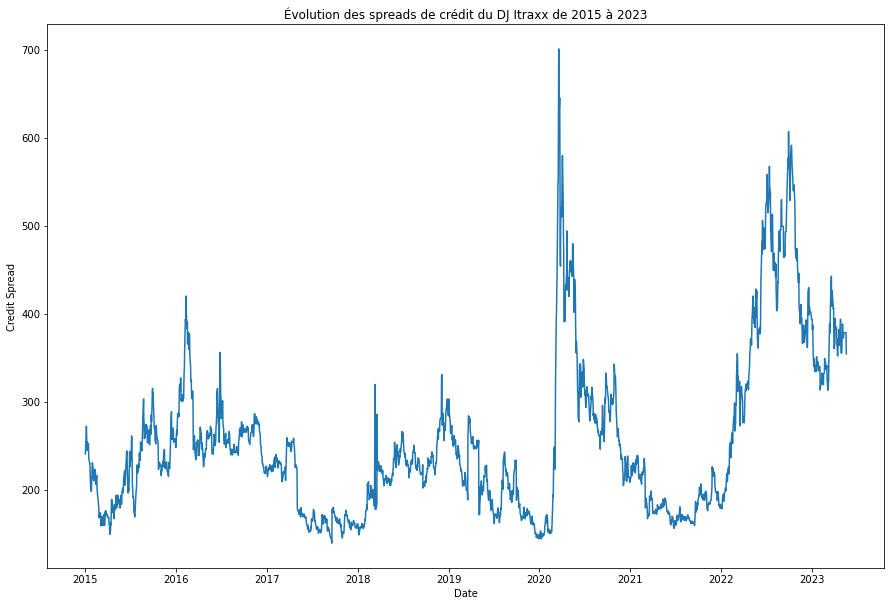

In [24]:
plt.figure(figsize=(15,10))
plt.plot(Itraxx.index,Itraxx['Credit_Spread'])
plt.xlabel('Date')
plt.ylabel('Credit Spread')
plt.title('Évolution des spreads de crédit du DJ Itraxx de 2015 à 2023')
plt.show()

**Analyse graphique/visuelle et interprétation de la série temporelle de spreads du DJ Itraxx X-over 3Y**

En regardant et en analysant de plus près la série temporelle des spreads du DJ Itraxx, nous remarquons que ces derniers ont eu une évolution assez volatile et instable dans le temps. En effet, le risque de crédit étant une composante cruciale et phare en finance quantitative, suite a la crise des subprimes et l'avènement des **valuations adjustments** dans la valorisation, les spreads de crédit sont devenus très volatiles ces dernières années. Cependant : 

- D'abord, nous remarquons une très grande hausse des spreads de crédit sur le DJ Itraxx à partir de 2020. En effet, du a la crise de covid, les spreads de crédit ont augmenté drastiquement car plusieurs entreprises ont fait défaut, attisant donc une incertitude et une méfiance accrue entre acteurs du marché ; 


- Ensuite, cette tendance haussière des spreads de crédit est suivie immédiatement par une tendance baissière : En effet, en 2021, soit une année après le covid, les interventions répétées de la BCE pour introduire de la liquidité sur le marché au travers du **quantitative et qualitative easing** ont semblé porter leurs fruits : On observe donc une baisse des spreads de crédit sur le marché a ce moment la ;


- De plus, en 2022 par contre, nous observons une nouvelle hausse des spreads de crédit sur le DJ Itraxx. En effet, les tensions géopolitiques ont favorisé une méfiance entre les acteurs du marché d'une part et d'autre part dans un tel contexte d'incertitudes, du fait que les indicateurs macroéconomiques aient chuté nous observons par conséquent une hausse des spreads de crédit sur le DJ Itraxx. Puis avec une nouvelle intervention de la BCE en haussant les taux d'intérèts de manière historique en Europe notamment (50 points de base) la liquidité fut introduite ce qui apaisa les marchés et malgré une forte inflation, les spreads se mirent a baisser ;


- Enfin, a partir de 2023 nous observons une nouvelle montée des spreads de crédit. Nous pouvons inférer que dues a des faillites importantes de banques américaines comme la **Silicon Valley Bank**, le scandale de la banque **Crédit Suisse**, la majorité des économies étant inter-dépendantes, la crainte de voir les effets se propager ont fait que les primes de risque ont explosé et que les spreads de crédit ont augmenté.


Le DJ Itraxx a connu une évolution assez volatile avons nous dit, cependant, comment se comportent alors les quantiles de cette série temporelle ? Autrement dit, la vitesse a laquelle les quantiles extrèmes de cette série temporelle augmentent est elle la meme que celle des quantiles faibles ? 

**Moyenne Mobile sur 90 jours de trading consécutifs**: 

Pour répondre a la question précédente, nous avons respectivement représenté les quantiles 10%, 50% et 90% de la moyenne mobile sur 90 jours de trading consécutifs puis nous avons tenter d'interpréter les résultats : 

- Nous remarquons que les niveaux de quantiles sont tous parallèles. Cela signifie que les quantiles les plus grands des spreads de crédit ont le meme niveau de croissance que les quantiles les plus faibles des memes spreads. Notons également que les quantiles a 50% (donc la médiane de spreads) sont parallèles aux quantiles de spreads 10% et 90%. **Par conséquent, nous pouvons donc inférer que historiquement les spreads de crédit du DJ Itraxx ont tous évolué à la meme vitesse, que ceux ci soient extrèmes donc grands, moyens (medians) ou petits.**

Cela s'implémente aisément avec la fonction <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html'>pandas.DataFrame.rolling</a> de Python: C'est une fonction qui permet de calculer la moyenne mobile sur un nombre quelquonque de jours d'une série temporelle, donc de donner une version lissée des données de manière simple en une ligne de code. 


Voir graphique ci-dessous : 

In [25]:
rolling_itraxx = Itraxx['Credit_Spread'].rolling(window=90)   # rolling windows avec pandas
Itraxx['Quantile 10%'] = rolling_itraxx.quantile(0.1)   # quantile 10 % 
Itraxx['Quantile 50%'] = rolling_itraxx.quantile(0.5)   # quantile 50 %
Itraxx['Quantile 90%'] = rolling_itraxx.quantile(0.9)   # quantile 90 %

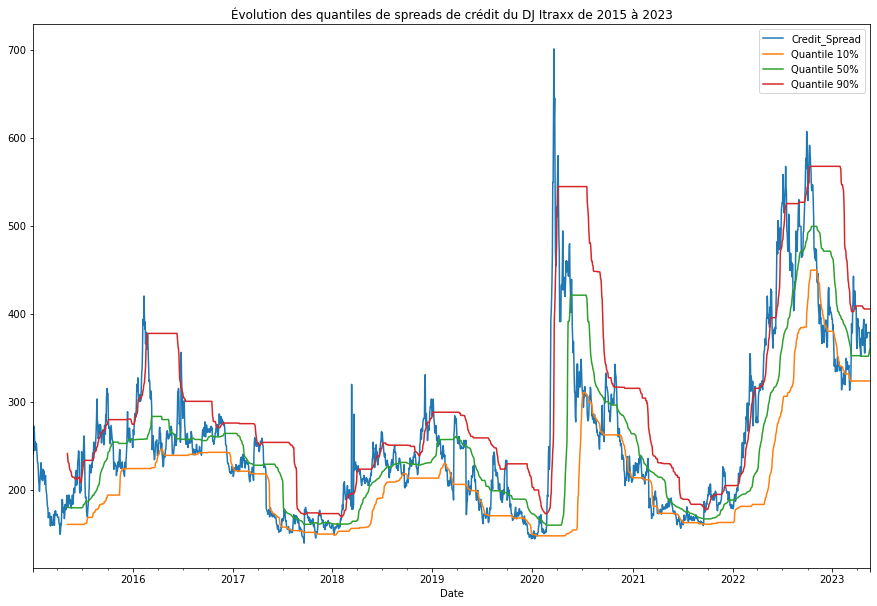

In [26]:
Itraxx.plot(figsize=(15,10), kind='line')
plt.title('Évolution des quantiles de spreads de crédit du DJ Itraxx de 2015 à 2023')
plt.show()

Les spreads du DJ Itraxx historiquement jusqu'à 2023, ont évolué a la meme vitesse. Qu'en est il alors de la volatilité du DJ Itraxx sur toute la période de 2015 à 2023 ? Autrement dit, dans quelles intervalles de volatilité moyenne se situent les spreads de crédit du DJ Itraxx ? 


**<em>Fonctions intermédiaires utilisées</em>**

<a href='https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.quantile.html'>pandas.core.window.rolling.Rolling.quantile</a> : Quantile d'une moyenne mobile. Exemple : moyenne mobile sur 120 jours consécutifs et quantile $30\%$ : $Itraxx['nomcolonne'].rolling(window=120).quantile(0.3)$

<a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html'>pandas.DataFrame.rolling</a> : Moyenne mobile d'un dataframe pandas. Exemple : moyenne mobile sur 80 jours : $Itraxx['nomcolonne'].rolling(window=80)$

**Bollingers Bands**

Les bandes de Bollinger sont un indicateur technique inventé par John Bollinger. Il s’agit d’un canal constitué de trois lignes. La ligne centrale est la moyenne mobile exponentielle des prix du marché sur $N$ périodes (par exemple, 20 périodes). Cette ligne centrale est entourée de deux autres lignes, les fameuses bandes de Bollinger. La distance qui les sépare de la moyenne mobile est égale à deux fois l’écart-type des $N$ périodes qui ont servi à calculer la moyenne mobile. Cela signifie que plus les bandes sont éloignées l’une de l’autre, plus la période est volatile. Inversement, plus les bandes sont proches l’une de l’autre, moins la volatilité est grande.

In [27]:
def smooth_moving_average(data, window):
    
    sma = data.rolling(window).mean()
    
    return sma 

def bollingers_Bands(data, sma, window):
    
    std = data.rolling(window).std()
    
    upper_bb = sma + std * 2
    
    lower_bb = sma - std * 2
    
    return upper_bb, lower_bb

In [28]:
Itraxx['upper_bollingers_bands'], Itraxx['lower_bollingers_bands'] = bollingers_Bands(Itraxx['Credit_Spread'],
                                                                                     smooth_moving_average(Itraxx['Credit_Spread'],90),90)

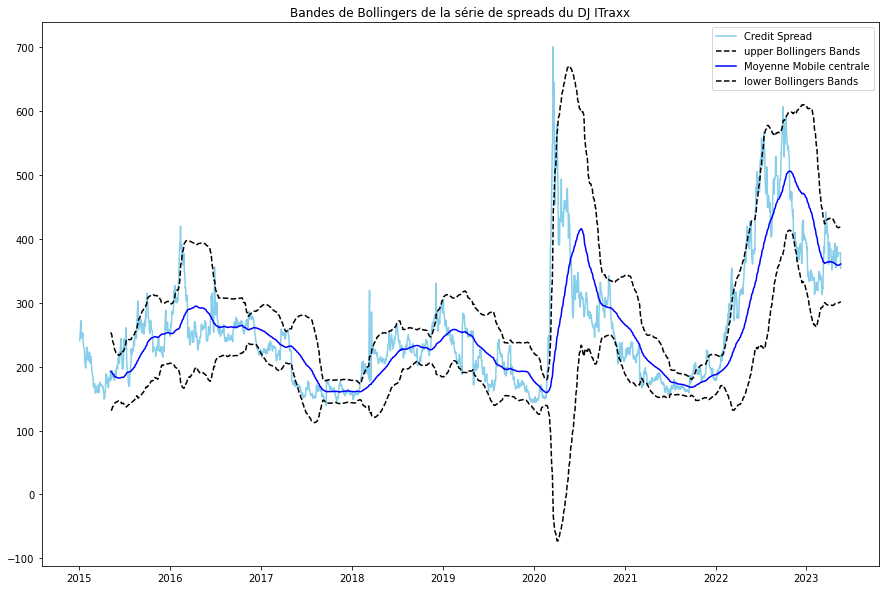

In [29]:
plt.figure(figsize=(15,10))
plt.plot(Itraxx['Credit_Spread'],color='skyblue',label='Credit Spread')
plt.plot(Itraxx['upper_bollingers_bands'],color='black',label='upper Bollingers Bands',linestyle='--')
plt.plot(smooth_moving_average(Itraxx['Credit_Spread'],90),label='Moyenne Mobile centrale',linestyle='-',color='blue')
plt.plot(Itraxx['lower_bollingers_bands'],color='black',label='lower Bollingers Bands',linestyle='--')
plt.legend()
plt.title('Bandes de Bollingers de la série de spreads du DJ ITraxx')
plt.show()

Les bandes de Bollingers nous permettent d'interpréter la volatilité des cours des actifs. Plus la borne inférieure et la borne supérieure sont éloignées de la bande en bleue, plus volatile est le cours des actifs. Par conséquent, on voit indubitablement que le cours des spreads de crédit sont bien volatiles.

# MODÉLISATION DE LA SÉRIE TEMPORELLE DES DONNÉES : DJ ITRAXX XOVER 3Y

La modélisation de la série temporelle du DJ Itraxx X-over 3Y, se fera en deux grandes étapes : 


- D'une part, nous modéliserons cette série temporelle avec les modèles $ARMA$ et tout ce qui va avec ; 


- Ensuite, nous allons passer à la modélisation $ARCH$ ET $GARCH$ ou modèles hétéroscédastiques.

## 1ÈRE PARTIE de la modélisation : MODÉLISATION $ARMA$

Lorsque l'on veut modéliser des séries temporelles, nous avons généralement deux choix : 

- **Les modèles linéaires** : Nous avons dans cette catégorie des modèles célèbres comme les $ARMA$, $ARIMA$, $ARIMAX$, $SARIMA$, $SARIMAX$, $VARMA$, $VARMAX$, etc... Ces types de modèles supposent que pour trouver l'équation mathématique qui gouverne la série temporelle que l'on a représentée, nous devons faire des hypothèses indispensables fortes et souvent non réalistes sine qua none de l'existence meme de ces modèles : Cette hypothèse est la **stationnarité**. Autrement dit, pour modéliser une série temporelle avec des modèles linéaires, il est indispensable que cette dernière soit stationnaire. Si ce n'est pas le cas, il faut **transformer la série pour se ramener toujours au cas d'une série stationnaire,auquel cas les modèles précédemment cités seront obsolètes et inutiles**. Nous verrons plus tard la définition de la stationnarité d'une série temporelle. L'avantage des modèles linéaires est qu'ils sont interprétables, facilement manipulables, que l'on a une parfaite compréhension de ce qui se passe meme a l'intérieur du modèle et un controle sur les paramètres meme du modèle. Par conséquent, l'hypothèse de stationnarité est donc fondamentale en théorie des séries temporelles avec modèles linéaires puisqu'elle assure l'existence meme de ces derniers. 


- **Les modèles d'apprentissage statistiques** : Ce sont les modèles de type Machine Learning, Deep learning et Reinforcement learning. **Un avantage non négligeable de ces modèles est qu'ils ne supposent aucune condition forte sur la série elle meme pour pouvoir la modéliser**. En effet, avec les modèles d'apprentissage automatique, nous pouvons, via la bonne architecture de neurones, apprendre les dépendances complexes de saisonnalité, de mémoire à court et long terme et des dépendances séquentielles de la série. Cela donne un avantage non négligeable puisque nous ne faisons aucune hypothèse forte pour modéliser. Mais l'inconvénient qui en découle est l'interprétabilité ! En effet, nous n'avons aucun controle sur comment le réseau apprend la dépendance séquentielle, comment il interprète les variables, quels poids il attribue a chaque réalisation historique pour prédire, etc...Et en théorie des séries temporelles, cela est crucial puisque dans certains domaines comme la finance et la météorologie, ne pas avoir les variables endogènes et exogènes les plus pertinentes s'avère couteux.


Dans notre cas présent, nous allons nous concentrer sur les méthodes les plus utilisées a savoir les méthodes linéaires comme le veut le sujet du projet et nous allons tenter de temps à autre de les challenger par des modèles d'apprentissage statistique. Sans plus tarder, passons a la première étape du processus de modélisation d'une série temporelle qui est l'étude de la stationnarité. 

#### ANALYSE DE LA STATIONNARITÉ DE LA SÉRIE TEMPORELLE DU DJ ITRAXX X-OVER 3Y

Une série temporelle est dite <em>**stationnaire**</em> si la moyenne et la variance de cette dernière sont **fixes entre deux points quelquonques équidistants. Autrement dit, quelque soit l'endroit d'ou l'on prend nos observations sur la série, la moyenne et la variance doivent rester inchangées. Une série temporelle qui exhibe une saisonalité n'est <em>pas</em> stationnaire.**

**De manière courante, on dit aussi qu'une série temporelle est stationnaire si elle ne présente ni tendance ni saisonnalité**.

Un test de stationarité impliques toujours  un test d'hypothèse sur <a href='https://en.wikipedia.org/wiki/Unit_root_test'>la racine unitaire</a>, ou l'hypothèse nulle $H_0$ est que la série est <em>nonstationnaire</em>, et contient une racine unitaire. L'hypothèse alternative $H_1$ affirme quant à elle, la stationarité. Le test de <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>Dickey-Fuller augmenté</a> et celui <a href='https://en.wikipedia.org/wiki/KPSS_test'>Kwiatkowski-Phillips-Schmidt-Shin</a> sont des tests de stationnarité. 

In [30]:
Itraxx = Itraxx.loc[:,['Credit_Spread']]

In [31]:
Itraxx['SMA_90'] = Itraxx['Credit_Spread'].rolling(window=90).mean()
Itraxx['std_90'] = Itraxx['Credit_Spread'].rolling(window=90).std()

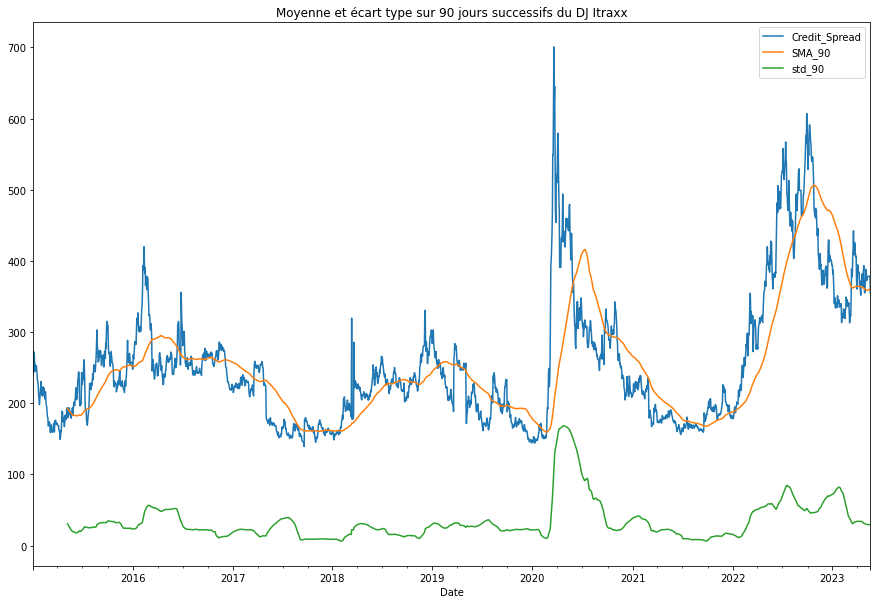

In [32]:
Itraxx[['Credit_Spread','SMA_90','std_90']].plot(figsize=(15,10),title='Moyenne et écart type sur 90 jours successifs du DJ Itraxx');

La série temporelle du DJ Itraxx est stationnaire si la moyenne et la variance de cette dernière sont fixes et invariables dans le temps. La courbe en orange représente la moyenne du DJ Itraxx X-over 3Y de 2015 à 2023. La courbe en vert représente son écart type, donc sa variance. On voit très clairement que la série temporelle du DJ Itraxx **n'est pas stationnaire**. Nous allons maintenant confirmer cela avec des tests de stationnarité, notamment Dickey-Fuller et kpss. 


**<em>Fonctions intermédiaires utilisées</em>**

<a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html'>pandas.DataFrame.mean</a> : Retourne la moyenne d'un dataframe pandas en Python. Il suffit de sélectionner la colonne que l'on désire avec l'extension .mean() a la fin pour que Python nous renvoie la moyenne. Exemple : $Itraxx['nomcolonne'].mean()$

<a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html'>pandas.DataFrame.std</a> : Retourne l'écart type d'un dataframe pandas en Python. Il suffit de sélectionner la colonne que l'on désire avec l'extension .std() a la fin pour que Python nous renvoie son écart type. Exemple : $Itraxx['nomcolonne'].std()$

<a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html'>pandas.DataFrame.plot</a> : retourne une représentation graphique de chaque colonne entière d'un dataframe. Pour représenter une colonne en particulier, juste sélectionner la colonne avec la formule $Itraxx['nomcolonne']$ et faire $Itraxx['nomcolonne'].plot()$. Pour le dataframe entier: $Itraxx.plot()$. Cette dernière commande plotte sur le meme graphe toutes les colonnes du dataframe $Itraxx$.

**Test de Dickey-Fuller**

Pour déterminer si une série est stationnaire ou non, nous pouvons utiliser le test de <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>Dickey-Fuller augmenté</a>. Dans ce test,  l'hypothèse nulle indique que $\phi = 1$ ( Il est également appelé racine unitaire ). Le test retourne plusieurs statistiques que nous verrons. Notre focus sera sur la p-value. Une petite p-value ($p<0.05$) indicate une forte evidence contre l'hypothèse nulle.


Dans le cadre de ce projet, nous avons coder une fonction qui nous permet d'interpréter de manière rapide et non confuse les résultats du test de Dickey-Fuller.

In [33]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string()) 
    
    if result[1] <= 0.05:
        print("Forte Conviction en opposition a l'hypothèse nulle")
        print("Rejet de l'hypothèse nulle")
        print("La série n'a aucune racine unitaire et est stationaire")
    else:
        print("Faible Conviction en opposition a l'hypothèse nulle")
        print("Non rejet de l'hypothèse nulle")
        print("La série admet une racine unitaire et est non stationaire")

In [34]:
Itraxx = Itraxx.loc[:,['Credit_Spread']]

In [35]:
adf_test(Itraxx['Credit_Spread'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -2.908199
p-value                    0.044403
# lags used               18.000000
# observations          2167.000000
critical value (1%)       -3.433371
critical value (5%)       -2.862875
critical value (10%)      -2.567481
Forte Conviction en opposition a l'hypothèse nulle
Rejet de l'hypothèse nulle
La série n'a aucune racine unitaire et est stationaire


**Test de kpss**

Le test Kpss est un autre test de vérification de stationarité de la série temporelle. Contrairement au test de Dickey Fuller, l'hypothèse $H_0$ est que la série temporelle est stationnaire en tendance et l'hypothèse $H_1$ est que la série n'est pas stationnaire. Autrement dit dans kpss, lorsque la p-value est $> 0.05$, la série temporelle est stationnaire tandis que si la p-value est $< 0.05$, la série temporelle est non stationnaire.

Tout comme ADF, nous avons écrit une fonction customisée permettant d'effectuer de manière moins confuse le test de kpss

In [36]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = kpss(series.dropna())
    
    labels = ['Kpss test statistic','p-value','# lags used']
    out = pd.Series(result[0:3],index=labels)

    for key,val in result[3].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string()) 
    
    if result[1] <= 0.05:
        
        print("Forte Conviction en opposition a l'hypothèse nulle")
        print("Rejet de l'hypothèse nulle")
        print("La série est non stationaire")
        
    else:
        
        print("Faible Conviction en opposition a l'hypothèse nulle")
        print("Non Rejet de l'hypothèse nulle")
        print("La série est stationaire")

In [37]:
kpss_test(Itraxx['Credit_Spread'])

Augmented Dickey-Fuller Test: 
Kpss test statistic       1.568894
p-value                   0.010000
# lags used              28.000000
critical value (10%)      0.347000
critical value (5%)       0.463000
critical value (2.5%)     0.574000
critical value (1%)       0.739000
Forte Conviction en opposition a l'hypothèse nulle
Rejet de l'hypothèse nulle
La série est non stationaire


/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Nous avons tourné précédemment nos deux tests ADF et kpss. Nous obtenons malheureusement deux résultats contradictoires : 

- D'une part, le test de Dickey-Fuller nous dit que la série temporelle du DJ Itraxx est stationnaire. En effet, la p-value est < 0.05, ce qui justifie que l'hypothèse $H_1$ de stationnarité est vérifiée 


- D'autre part, le test de kpss nous dit que la meme série temporelle du DJ Itraxx n'est pas stationnaire. En effet, la p-value est encore une fois < 0.05, ce qui justifie que l'hypothèse $H_1$ est vérifiée et contredit l'hypothèse de stationnarité. 

Une question se pose donc : Quel test faut il considérer ? Quel résultat est le plus probable ? A vue d'oeil, on voit clairement que la série temporelle du DJ Itraxx n'est pas stationnaire ( moyenne non constante et variance non constante dans le temps ). 


Sur le site officiel de la documentation de la librairie statsmodels de Python <a href='https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html'>Dickey-Fuller augmenté vs kpss : Quelle conclusion tirer ?</a>, des directives sont données. En effet, selon le quatrième cas, il est écrit : 

- KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity


On en déduit donc plusieurs conséquences fondamentales : 

- **La série temporelle du DJ Itraxx n'est pas stationnaire en vertu du quatrième cas de la documentation de la libraire statsmodels de Python** ; 


- **En vertu du quatrième cas, dans le cas ou kpss et ADF sont contradictoires, c'est la série différenciée qui est stationnaire. Si ce n'était pas le cas, en vertu du troisième cas, si ADF était non stationnaire et kpss était stationnaire, c'est la série sans tendance et non la série différenciée comme precédemment qui serait stationnaire. Dans un tel cas, il faudrait enlever la tendance de la série et elle deviendrait stationnaire** ; 


- **Le test de ADF à lui seul ne suffit pas à conclure de la stationnarité d'une série temporelle. Il est important de visualiser la série en meme temps que les résultats du test de ADF** ; 


- **Toujours tourner ADF et kpss, voir plus de tests si possible pour se rassurer des résultats de la stationnarité**


Voyons maintenant si la série différenciée du DJ ITraxx est bien stationnaire conformément aux astuces de la documentation statsmodels sur leurs modules de modélisation de séries temporelles.

Avant tout, une question se pose donc : Que signifie différencier une série temporelle ? 

<div class="alert alert-info"><h3>Récapitulatif des fonctions principales utilisées:</h3>
 
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html'>stattools.adfuller</a></strong><font color=black>(x[, maxlag, regression, …])</font>&nbsp;&nbsp;Test de la racine unitaire Augmented Dickey-Fuller  <br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html'>stattools.kpss</a></strong><font color=black>(x[, regression, lags, store])</font>&nbsp;&nbsp;&nbsp;&nbsp;Test de stationarité Kwiatkowski-Phillips-Schmidt-Shin .<br>

<h3>Ressources:</h3>
<strong>
<a href='https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Augmented Dickey–Fuller test</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/KPSS_test'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Kwiatkowski-Phillips-Schmidt-Shin test</font><br>

</div>



**Différentiation**

Comme nous l'avons précédemment mentionné, il existe une autre forme de non stationnarité, provenant non pas de la présence d'une composante tendancielle, mais d'une source stochastique. C'est pourquoi nous allons à présent introduire la définition des processus $D S$ pour Differency Stationnary en vertu du quatrième cas.

**Un processus non stationnaire $\left(x_t, t \in \mathbb{Z}\right.$ ) est un processus $D S$ (Differency Stationnary) d'ordre $d$, où d désigne l'ordre d'intégration, si le processus filtré défini par $(1-L)^d x_t$ est stationnaire. On dit aussi que $\left(x_t, t \in \mathbb{Z}\right)$ est un processus, intégré d'ordre $d$, noté $I(d)$.**

Ainsi, on peut définir une classe de processus stochastiques qui ne satisfont pas les conditions de la stationnarité, mais dont la différence à l'ordre $d$ satisfait elle les propriétés de la stationnarité. Par exemple, si un processus $z_t$ n'est pas stationnaire, on dit que ce processus est $D S$, intégré **d'ordre un**, noté $I(1)$, si le processus défini par la différence première $\Delta z_t=z_t-z_{t-1}$ = $z_t$ - $L z_t$ = $( 1 - L)z_t$ est quant à lui stationnaire. De la même façon, le processus $z_t$ est $I(2)$ si le processus défini par la différence seconde $(1-L)^2 z_t=(1-L) \Delta z_t=z_t-2 z_{t-1}+z_{t-2}$ est stationnaire.

Aussi connu sous le nom de "Backshift Operator", la notation de décalage représentée par la lettre $L$ reflète la valeur de $x$ à un moment précédent. C'est une technique utile pour effectuer des <em>régressions</em> comme nous le verrons dans les sections à venir.

\begin{split}L{x_t} = x_{t-1} & \text{ représente un décalage des données en arrière d'une période} \\
L^{2}{x_t} = x_{t-2} & \text{ représente deux décalages des données en arrière de deux périodes} \end{split}
<br><br>

<table>
<tr><td>$x_t$</td><td>6</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$x_{t-1}$</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$x_{t-2}$</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
</table>

NB : Lire le tableau de droite vers la gauche et non l'inverse !

In [38]:
from statsmodels.tsa.statespace.tools import diff

Itraxx['d(1)'] = diff(Itraxx['Credit_Spread'],
                      k_diff=1,               # différentiation d'ordre 1
                      k_seasonal_diff=None,    # Aucune différentiation saisonnale
                      seasonal_periods=1)

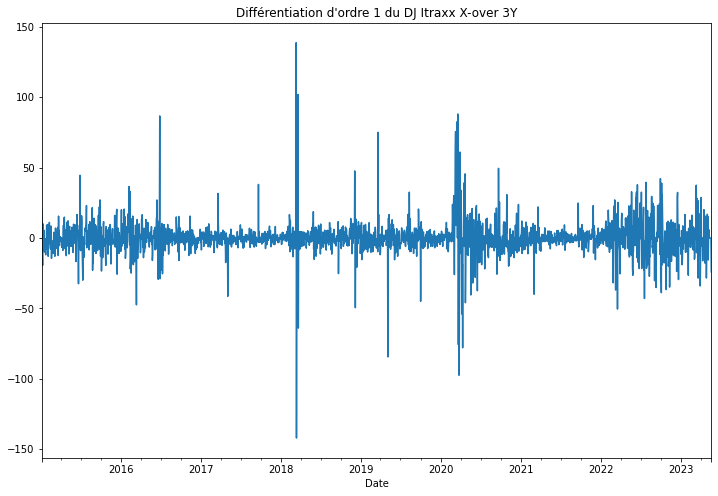

In [39]:
Itraxx['d(1)'].plot(title="Différentiation d'ordre 1 du DJ Itraxx X-over 3Y",figsize=(12,8)).autoscale(axis='x',tight=True)
plt.show()

Testons encore une fois de plus les différents tests de stationnarité avec nos différentes fonctions customisées et voyons le résultat.

In [40]:
adf_test(Itraxx['d(1)'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.179985e+01
p-value                 9.387160e-22
# lags used             1.700000e+01
# observations          2.167000e+03
critical value (1%)    -3.433371e+00
critical value (5%)    -2.862875e+00
critical value (10%)   -2.567481e+00
Forte Conviction en opposition a l'hypothèse nulle
Rejet de l'hypothèse nulle
La série n'a aucune racine unitaire et est stationaire


In [41]:
kpss_test(Itraxx['d(1)'])

Augmented Dickey-Fuller Test: 
Kpss test statistic       0.027279
p-value                   0.100000
# lags used              18.000000
critical value (10%)      0.347000
critical value (5%)       0.463000
critical value (2.5%)     0.574000
critical value (1%)       0.739000
Faible Conviction en opposition a l'hypothèse nulle
Non Rejet de l'hypothèse nulle
La série est stationaire


/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


La série temporelle différenciée d'ordre 1 du DJ Itraxx X-over 3Y est donc bien stationnaire. Nous pouvons passer a présent aux fonctions d'autocovariances et d'autocorrélations

<div class="alert alert-info"><strong>NOTE:</strong> La meme opération de différentiation peut etre appliquée avec Pandas. Cette facon de procéder à le mérite de nous faire comprendre comment fonctionne les calculs:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;<font color=black><tt>Itraxx['d(1)'] = Itraxx['Credit_Spread'] - Itraxx['Credit_Spread'].shift(1)</tt></font></div>
    
En utilisant l'opérateur __.shift(1)__, Pandas décale la colonne qui représente nos données observées de la série temporelle de 1 unité de temps. Lorsque l'on applique la soustraction pour trouver $Itraxx[d(1)]$ on voit indiscutablement que on éffectue l'opération $x_t$ - $x_{t-1}$ = $x_t$ - $Lx_t$ = $(1 - L)x_t$ = $\Delta{x_t}$. c'est la nouvelle série que l'on obtient que l'on étudie pour voir la stationarité.

<div class="alert alert-info"><h3>Fonction principale utilisée dans cette section:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.tools.diff.html'>statespace.tools.diff</a></strong><font color=black>(series[, k_diff, …])</font>&nbsp;&nbsp;Differencie une série temporelle simplement et/ou de manière saisonnale sur l'axe 0.</tt></div>

**IMPORTANT : IL EST INDISPENSABLE DE NE PAS TOMBER DANS CE QUE L'ON APPELLE LA SURDIFFÉRENTIATION OU OVER-DIFFERENCING D'UNE SÉRIE TEMPORELLE ! LA QUESTION QUE L'ON SE POSE EST LA SUIVANTE : COMMENT TROUVER LE PARAMÈTRE D'INTÉGRATION OPTIMAL POUR MA SÉRIE TEMPORELLE ? SANS TOMBER DANS LA SOUS-DIFFÉRENTIATION OU LA SUR-DIFFÉRENTIATION, CE QUI SERAIT PRÉJUDICIABLE PAR LA SUITE ? IL EXISTE EN EFFET, UNE MANIÈRE ÉLÉGANTE DE DÉTERMINER SI ON A SURDIFFÉRENCIÉ UNE SÉRIE TEMPORELLE. POUR CE FAIRE, INTRODUISONS LE CONCEPT D'AUTOCORRÉLATIONS ET AUTOCOVARIANCES, DE GRAPHES ET D'ANALYSES**

#### ANALYSE DES FONCTIONS ET GRAPHES D'AUTOCORRÉLATIONS ACF/PACF PLOTS DU DJ ITRAXX X-OVER 3Y

Pour parler d'autocorrélations, nous devons tout d'abord parler de la fonction d'autocovariance, car c'est en partant de la covariance que l'on parvient à la corrélation. 

**Fonctions d'autocovariances en théorie des séries temporelles**


Dans une <em>fonction déterministe</em>, comme $y=sin(x)$, nous connaissons toujours la valeur de $y$ pour une valeur donnée de $x$. Pourtant, dans un <em>processus stochastique</em> il y aura toujours de l'incertitude ou de l'aléatoire qui nous empèche de  connaitre avec exactitude la valeur de $y$. Par conséquent, nous devons analyser
le comportement passé ou (<em>lagged</em> version) de la série temporelle pour dériver une estimation probabiliste pour $\hat{y}$. Comment s'est elle comportée dans le passé ? Autrement dit, étudier l'intéraction qu'une série temporelle à avec sa <em>lagged version</em>, c'est à dire la meme série temporelle mais décalée de plusieurs unités de temps, peut nous donner plusieurs indices quant au comportement futur de cette dernière. En fait, l'étude d'une telle relation nous donne des indices quant à la prédictibilité de la série elle meme. Est elle prévisible compte tenu du passé ou non ? 


Une métrique utile est la <em>covariance</em>. Lorsque nous parlons de la dépendance ou de l'indépendance entre les variables $x$ et $y$, la covariance décrit comment la variance dans $x$ est liée à la variance dans $y$. Ici, la norme de la covariance n'est pas vraiment importante, comme $x$ et $y$ peuvent avoir des échelles très différentes. Cependant, si la covariance est positive, cela signifie que $x$ et $y$ varient dans la meme direction et pourraient etre liés.

Avec une série temporelle, $x$ est définie sur un intervalle fixe. Par conséquent ici, nous voulons regarder la variance de $y_t$ contre les <em>lagged or shifted values</em> de $y_{t+k}$

Pour une série temporelle stationnaire, la fonction d'autocovariance pour $\gamma$ (gamma) est donnée par:

${\displaystyle {\gamma}_{XX}(t_{1},t_{2})=\operatorname {Cov} \left[X_{t_{1}},X_{t_{2}}\right]=\operatorname {E} [(X_{t_{1}}-\mu _{t_{1}})(X_{t_{2}}-\mu _{t_{2}})]}$

Nous calculons un $\gamma_k$  spécifique avec:

${\displaystyle \gamma_k = \frac 1 n \sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})}$

**Exemple**



Disons que nous avons une série temporelle avec les observations suivantes: {13, 5, 11, 12, 9}.<br>
Nous pouvons rapidement voir que $n = 5$, la moyenne $\bar{y} = 10$, et nous verrons que la variance est égale à $\sigma^2 = 8$.<br>
Les calculs suivants nous donnent nos valeurs d'auto-covariance:
<br><br>
$\gamma_0 = \frac {(13-10)(13-10)+(5-10)(5-10)+(11-10)(11-10)+(12-10)(12-10)+(9-10)(9-10)} 5 = \frac {40} 5 = 8.0 \\
\gamma_1 = \frac {(13-10)(5-10)+(5-10)(11-10)+(11-10)(12-10)+(12-10)(9-10)} 5 = \frac {-20} 5 = -4.0 \\
\gamma_2 = \frac {(13-10)(11-10)+(5-10)(12-10)+(11-10)(9-10)} 5 = \frac {-8} 5 = -1.6 \\
\gamma_3 = \frac {(13-10)(12-10)+(5-10)(9-10)} 5 = \frac {11} 5 = 2.2 \\
\gamma_4 = \frac {(13-10)(9-10)} 5 = \frac {-3} 5 = -0.6$
<br><br>

Remarque : $\gamma_0$ est juste la variance de la population $\sigma^2$

Cet exemple peut etre exécuté de manière vraiment rapide avec la libraire statsmodels de Python. 

In [42]:
from statsmodels.tsa.stattools import acovf
df = pd.DataFrame({'a':[13, 5, 11, 12, 9]})
acovf(df['a'])

array([ 8. , -4. , -1.6,  2.2, -0.6])

**Fonction d'autocovariance non biaisée**

Notons que le nombre de terme dans les calculs ci-dessus sont decroissants.<br>Statsmodels peut retourner une autocovariance non biaisée ou au lieu de diviser par $n$ on divise par $n-k$.

$\gamma_0 = \frac {(13-10)(13-10)+(5-10)(5-10)+(11-10)(11-10)+(12-10)(12-10)+(9-10)(9-10)} {5-0} = \frac {40} 5 = 8.0 \\
\gamma_1 = \frac {(13-10)(5-10)+(5-10)(11-10)+(11-10)(12-10)+(12-10)(9-10)} {5-1} = \frac {-20} 4 = -5.0 \\
\gamma_2 = \frac {(13-10)(11-10)+(5-10)(12-10)+(11-10)(9-10)} {5-2} = \frac {-8} 3 = -2.67 \\
\gamma_3 = \frac {(13-10)(12-10)+(5-10)(9-10)} {5-3} = \frac {11} 2 = 5.5 \\
\gamma_4 = \frac {(13-10)(9-10)} {5-4} = \frac {-3} 1 = -3.0$

In [43]:
acovf(df['a'],unbiased=True)

array([ 8.        , -5.        , -2.66666667,  5.5       , -3.        ])

**Fonctions d'autocorrélations en théorie des séries temporelles**

La correlation $\rho$ (rho) entre deux variables $y_1,y_2$ est donnée comme:

### $\rho = \frac {\operatorname E[(y_1−\mu_1)(y_2−\mu_2)]} {\sigma_{1}\sigma_{2}} = \frac {\operatorname {Cov} (y_1,y_2)} {\sigma_{1}\sigma_{2}}$,

ou $E$ est l'operateur d'espérance, $\mu_{1},\sigma_{1}$ and $\mu_{2},\sigma_{2}$ sont la moyenne et l'écart type de $y_1$ et $y_2$.

Lorsque l'on travaille avec une seule variable (i.e. <em>autocorrelation</em>) on doit considerer par conquésent $y_1$ comme étant la série originelle et $y_2$ comme sa <em>lagged version</em> . Notons que avec l'autocorrelation nous travaillons avec $\bar y$, qui est, la moyenne totale de la population, et  <em>non</em> la moyenne de l'ensemble réduit des <em>lagged factors</em> .

Ainsi, la formule pour $\rho_k$ pour la serie temporelle au pas $k$ est:

${\displaystyle \rho_k = \frac {\sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})} {\sum\limits_{t=1}^{n} (y_t - \bar{y})^2}}$

Cela peut etre réécrit en terme de la covariance constante $\gamma_k$ comme:

${\displaystyle \rho_k = \frac {\gamma_k n} {\gamma_0 n} = \frac {\gamma_k} {\sigma^2}}$

Par exemple, en prenant toujours l'exemple précédent, on a que : <br>
$\rho_4 = \frac {\gamma_4} {\sigma^2} = \frac{-0.6} {8} = -0.075$

Notons que les valeurs de l'autocorrélation sont bornées par -1 and 1. C'est a dire que, ${\displaystyle -1 \leq \rho_k \leq 1}$

C'est d'ou vient le terme fonction d'autocorrélation car pour chaque $k$ on associe une corrélation bien précise de la série temporelle avec ses propres valeurs passées/décalées. Une fois cette fonction obtenue, on peut facilement tracer ce que l'on appelle le **ACF plot qui n'est rien d'autre que la fonction d'autocorrélation représentée graphiquement et sur lequel à chaque $k$, on associe la valeur numérique de la corrélation correspondante entre la série et sa lagged version d'ordre $k$.**

Sur Python, statsmodels le fait très aisément : 

In [44]:
from statsmodels.tsa.stattools import acf
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

**Fonctions d'autocorrélation partielle**

L'autocorrélation partielle mésure la dépendance lineaire d'une variable après avoir supprimé l'effet des autres variables qui affectent à la fois toutes les variables. Autrement dit, l'autocorrélation partielle au pas $k$ est l'autocorrelation entre $y_t$ et $y_{t+k}$ qui ne tient pas compte de l'influence des variables pour les pas allant de $1$ à $k−1$.

Une méthode commune emploie la non-recursivité des <a href='https://en.wikipedia.org/wiki/Autoregressive_model#Calculation_of_the_AR_parameters'>équations de Yule-Walker</a>:

$\phi_0 = 1\\
\phi_1 = \rho_1 = -0.50\\
\phi_2 = \frac {\rho_2 - {\rho_1}^2} {1-{\rho_1}^2} = \frac {(-0.20) - {(-0.50)}^2} {1-{(-0.50)}^2}= \frac {-0.45} {0.75} = -0.60$


Comme $k$ augmente, nous pouvons résoudre $\phi_k$ en utilisant une matrice algebrique et l'algorithme récursif de <a href='https://en.wikipedia.org/wiki/Levinson_recursion'>Durbin-Levinson</a> qui lie les autocorrelations $\rho$ à une matrice de <a href='https://en.wikipedia.org/wiki/Toeplitz_matrix'>Toeplitz</a> à diagonale constante. Ci-joint un exemple de la procédure qui permet de trouver les autocorrélations partielles :


$\displaystyle \begin{pmatrix}\rho_0&\rho_1&\cdots &\rho_{k-1}\\
\rho_1&\rho_0&\cdots &\rho_{k-2}\\
\vdots &\vdots &\ddots &\vdots \\
\rho_{k-1}&\rho_{k-2}&\cdots &\rho_0\\
\end{pmatrix}\quad \begin{pmatrix}\phi_{k1}\\\phi_{k2}\\\vdots\\\phi_{kk}\end{pmatrix}
\mathbf = \begin{pmatrix}\rho_1\\\rho_2\\\vdots\\\rho_k\end{pmatrix}$

In [45]:
from statsmodels.tsa.stattools import pacf_yw
pacf_yw(df['a'],nlags=4,method='mle')

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

**Autocorrélations partielles OLS**

Ce framework fournit les autocorrelations partielles avec la <a href='https://en.wikipedia.org/wiki/Ordinary_least_squares'>méthodes des moindres carrés ordinaires</a> (OLS) pour l'estimation de chaque autocorrélations plutot que celle de Yule-Walker.

In [46]:
from statsmodels.tsa.stattools import pacf_ols, pacf
pacf_ols(df['a'],nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

Dans le cadre du DJ Itraxx X-over 3Y, voici ce que nous obtenons comme acf et pacf

In [47]:
acf(Itraxx['d(1)'].dropna())

array([ 1.00000000e+00,  7.80589232e-04, -2.52591487e-03,  1.69372269e-02,
       -3.98315892e-02, -8.60605654e-02,  4.02723751e-02, -9.85937108e-03,
        9.51907574e-03,  6.17599049e-02,  1.92761441e-02,  1.75726468e-02,
        1.93066991e-03, -1.94214070e-02,  2.53582794e-02, -3.53554811e-02,
       -2.12116517e-02, -5.60120143e-03, -6.98337472e-02, -1.74132355e-02,
        1.51226419e-02, -1.98356287e-03, -2.89807835e-02, -3.84443223e-02,
       -2.76473254e-03,  6.32502378e-03,  3.96348365e-03,  4.88323592e-03,
       -7.29723936e-03, -1.89499898e-02, -9.91358466e-03, -1.76835642e-02,
        1.07720621e-02, -7.04142290e-03])

In [48]:
pacf(Itraxx['d(1)'].dropna())

array([ 1.00000000e+00,  7.80946645e-04, -2.52884046e-03,  1.69645868e-02,
       -3.99501003e-02, -8.62419689e-02,  4.02256864e-02, -8.94624628e-03,
        1.10545729e-02,  5.43795020e-02,  1.54787148e-02,  2.38958083e-02,
       -2.33538881e-03, -1.33870621e-02,  3.56771702e-02, -3.63470622e-02,
       -1.79868559e-02, -1.04807388e-02, -7.47964468e-02, -1.56627093e-02,
        2.22809340e-03, -1.03554069e-03, -3.35703182e-02, -5.59851525e-02,
        5.24336367e-03,  1.16782641e-02,  5.91617861e-03,  8.47598614e-03,
       -1.06279841e-02, -1.15326379e-02, -8.44570171e-03, -1.67450370e-02,
        2.21004773e-02, -1.21895339e-02])

In [49]:
pacf_yw(Itraxx['Credit_Spread'].dropna(),method='mle')

array([ 1.        ,  0.9904954 , -0.01156926, -0.0019087 , -0.02176158,
        0.03329088,  0.07916362, -0.0443616 ,  0.00490454, -0.0150958 ,
       -0.05604556, -0.01974386, -0.03278168,  0.00151201,  0.00785161,
       -0.0350493 ,  0.02934868,  0.00819913, -0.00215219,  0.06894913,
        0.01300921, -0.00216599, -0.01016856,  0.02925921,  0.04975404,
       -0.00948882, -0.00791029, -0.01203505, -0.01116413,  0.00418576,
        0.00143524,  0.00588013,  0.01203315, -0.0258578 ])

In [50]:
pacf_ols(Itraxx['Credit_Spread'].dropna())

array([ 1.        ,  0.9910258 , -0.00548767, -0.00218905, -0.02178694,
        0.03521708,  0.08208153, -0.04423421,  0.00462842, -0.01521107,
       -0.05872263, -0.02025701, -0.02878434, -0.00283598,  0.0080508 ,
       -0.04083441,  0.03102568,  0.01269528,  0.00555416,  0.06981667,
        0.01142106, -0.00633348, -0.00329449,  0.02960307,  0.0525222 ,
       -0.00896002, -0.01549751, -0.01021698, -0.01255968,  0.00735468,
        0.00773846,  0.00478087,  0.01291175, -0.02636413])

**A quoi sert donc toutes ces valeurs d'acf et de pacf concrètement ?**

Toutes ces valeurs que nous venons de calculer servent a faire une chose très capitale en série temporelle : Représenter graphiquement l'ACF et le PACF de la **série temporelle différenciée**. **En effet, grace à ces graphiques nous pourront déterminer l'ordre des modèles linéaires que l'on doit choisir pour réprésenter mathématiquement la série temporelle du DJ Itraxx et donc faire une prédiction. Nous reviendrons plus tard sur ce point.**

#### ACF PLOTS ET PACF PLOTS DU DJ ITRAXX X-OVER 3Y 

Comme mentionné précédemment, les acf et pacf plots permettent de déterminer le nombre de paramètres que va contenir notre modèle mathématique linéaire pour représenter la série temporelle étudiée. Ce qui nous fait donc tirer une conclusion capitale : **Les ACF et PACF plots ne marchent qu'avec des séries temporelles stationnaires. Autrement dit, si nous voulons déterminer le nombre de paramètres que va devoir contenir notre modèle linéaire, nous devons nous servir des graphes d'autocorrélations et d'autocorrélations partielles de la série temporelle que l'on aura pris le soin de stationnariser au préalable. Si cette dernière n'est pas stationnaire, il faut la stationnariser**.

Nous allons a présent représenter les acf et pacf plots de la série temporelle différenciée du DJ Itraxx X-over 3Y avec statsmodels.

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

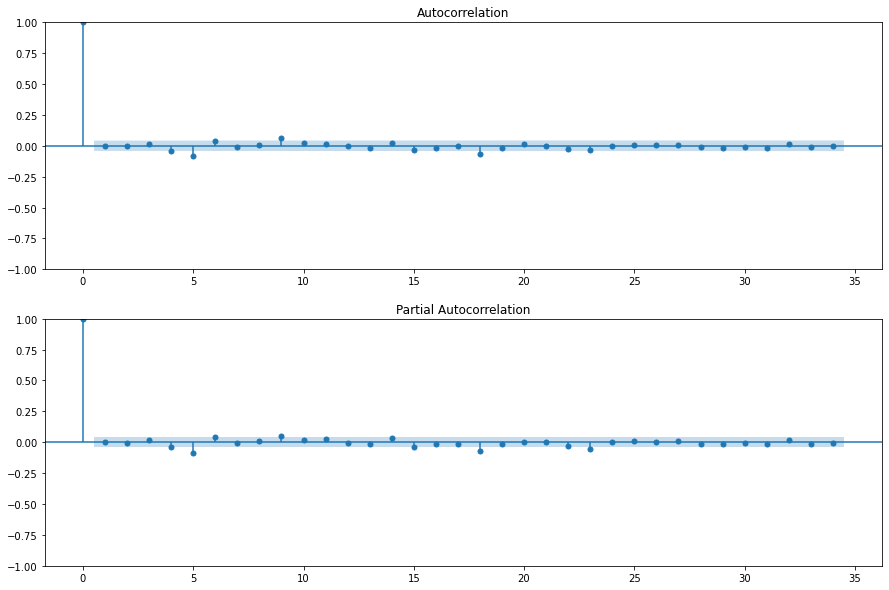

In [52]:
fig , (ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
plot_acf(Itraxx['d(1)'].dropna(), alpha= 0.05, lags=None, ax=ax1)
plot_pacf(Itraxx['d(1)'].dropna(), alpha=0.05, lags=None, ax=ax2)
plt.show()

**Comment interpréter ce graphe ?**

Il existe plusieurs manières d'interpréter le graphe de plot ACF et PACF : 


**Règle fondamentale** : **L'ACF et le PACF d'ordre 0 sont toujours égaux à 1.** On en revient à la définition. L'autocorrélation est la corrélation de la série temporelle avec sa <em>lagged</em> version, c'est à dire une copie décalée d'elle meme ( $x_t$ corrélée avec $x_{t-k}$ ). A l'odre 0 ($k=0$), c'est la corrélation de la série temporelle avec elle meme. Triviallement, on voit que cela donne toujours 1. Donc sur les plots ACF et PACF, la toute première valeur sera toujours égale à 1.



**1ère interprétation : La bande bleue et les points s'y trouvant** : 

La bande bleue est un intervalle de confiance. Elle est matérialisée par le paramètre <em>alpha</em> dans les plot_acf et plot_pacf de la librairie statsmodels. Plus ce paramètre est grand, plus la largeur de bande bleue sur Python le sera également. Comment interprète t'on cette bande et les points qui y sont à l'intérieur ? N'oublions pas que les points se trouvant à l'intérieur représentent des autocorrélations et autocorrélations partielles. 

<em>alpha</em> = 0.05, cela signifie donc que **si la vraie autocorrélation est égale à 0 ( la vraie autocorrélation est celle représentée avec les espérances mathématiques dans les sections précédentes ), il ya que seulement 5% de chance que l'autocorrélation estimée ( celle qui à été calculée cette fois sur Python avec des sommes mathématiques et sur des données historiques ) tombe en dehors de cette bande bleue. Autrement dit, si la vraie autocorrélation théorique avec les espérances est nulle, il ya 95% de chance que son autocorrélation estimée correspondante soit statistiquement nulle également et donc par conséquent tombe dans la zone bleue. Idem pour l'autocorrélation partielle.**

 Toutes les autocorrélations sortant en dehors de la zone bleue sont dit **significativement différents de zéro**. 


Une question fondamentale se pose donc : Quel est l'intérèt que certaines autocorrélations soient nulles ? Pourquoi certaines ne le sont pas ? Quel est le rapport avec notre série temporelle justement ? 


**2ème interprétation : Prédictibilité de la série temporelle**

**Plus une série temporelle a des autocorrélations qui sont statistiquement différents de zéro, plus cette série temporelle est prédictible.** En effet, l'autocorrélation est la corrélation qu'une série temporelle à avec sa <em>lagged</em> version. Intuitivement, si cette corrélation est statistiquement différente de zéro, cela signifie que si deux jours avant ( donc $k = 2$ , on parle de la série temporelle $x_{t-2}$ ), si le cours du DJ Itraxx était haut, il ya de fortes chances que la série du DJ Itraxx aujourdh'ui $x_t$ soit haut si la corrélation entre cette dernière et sa propre version il ya deux jours était positive et se rapproche de 1. Et ainsi de suite avec les autres corrélations...On voit que on peut se servir du passé pour estimer le futur et voir à quoi il pourrait ressembler. **C'est le propre meme des graphes d'autocorrélations et d'autocorrélations partielles : voir graphiquement si on peut se servir du passé pour prédire le comportement futur de la série au travers des autocorrélations statistiquement différentes de zéro.** 

**Par conséquent, si on stationnarise une série temporelle et que l'on trace son graphe acf et pacf, si on voit sur le graphe des autocorrélations ou autocorrélations partielles qui sont statistiquement différentes de zéro, et donc qui sortent de la bande bleue, alors notre série temporelle est bien prédictible. On peut donc se servir de ses valeurs passées pour prédire ses valeurs futures**

Ci joint une image récapitulative de l'intuition derrière ce graphe : 

<img src="acf.png" alt="Transposition of a vector" title="Vector transposition" width="500">

La corrélation d'ordre 0 est toujours égale à 1. Nous avons deux corrélations qui sont statistiquement différentes de zéro. Les deux derniers jours de données historiques suffisent amplement à décrire cette série temporelle. Ceci est juste une intuition pour nous aider à comprendre comment fonctionne les graphes ACF. Nous verrons plus tard les règles de base prédéfinies à suivre rigoureusement pour déterminer la taille optimale de jeu de données historiques à considérer pour bien modéliser et représenter mathématiquement la série.

##### SURDIFFÉRENTIATION

Nous avons parlé précédemment de la surdifférentation. Le fait de différencier trop de fois une série là ou un nombre moins élevé aurait été suffisant. Le graphe ACF permet de savoir si on à surdifférencier une série temporelle ou pas. Donc il est primordial de faire attention. 

<img src="acf_pacf.png" alt="Transposition of a vector" title="Vector transposition" width="500">


Lorsque l'autocorrélation/partielle d'ordre 0 d'une série temporelle est négative, cela doit nous alerter. C'est le signe en effet que la série temporelle a été différenciée un nombre de fois non nécessaire. Dans ce cas, l'autocorrélation/partielle d'ordre 0 n'est plus égale à 1 mais un nombre négatif. Nous devons revenir a l'étape de différentiation et recommencer en s'assurant cette fois de différencier un nombre de fois juste.


Ayant compris à quoi servaient les graphes ACF et PACF, nous allons maintenant passer à la modélisation, c'est à dire déterminer la quantité optimale de données que l'on doit prendre en considération pour représenter mathématiquement la série temporelle. 

Récapitulons les étapes :

- **Importer la base de donnée** 

- **Visualiser la base de donnée** 

- **Tests de stationnarité et stationnariser la série si elle ne l'est pas déjà** 

- **Tracer des ACF plots et PACF plots de la série temporelle stationnaires** 

- **Déterminer la taille des données historiques à considérer pour bien modéliser la série temporelle ou modélisation**   

Nous allons à présent passer à la dernière étape du processus : la modélisation

Une fois les graphes ACF et PACF obtenus, nous devons maintenant choisir l'ordre a partir duquel nous allons considérer nos données historiques ( la taille de données historiques optimale )  pour mieux représenter mathématiquement la série temporelle observée. Autrement dit, pour modéliser ma série dois je prendre deux jours de données historiques niveau ACF et 3 niveau PACF( ie 2 autocorrélations significativement non nulles niveau ACF et 3 niveau PACF  ) ? Ou 1 jour niveau ACF et 6 niveau PACF ( ie 1 autocorrélation significativement non nulle niveau ACF et 6 niveau PACF ) ?  Pour ce faire, nous aurons besoin d'un modèle. On introduit donc la notion de modèle $ARMA$ , modèles très célèbres et très utilisés en théorie des séries temporelles et leurs variantes. Il est primordial de retenir que les graphes ACF et PACF nous permettent de déterminer le nombre de paramètres que vont contenir nos modèles de type $ARMA$.

<div class="alert alert-info"><h3>Fonctions principales utilisées:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acovf.html'>stattools.acovf</a></strong><font color=black>(x[, unbiased, demean, fft, …])</font>&nbsp;Autocovariance 1D<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html'>stattools.acf</a></strong><font color=black>(x[, unbiased, nlags, qstat, …])</font>&nbsp;&nbsp;Fonction d'autocorrélation pour les tableaux 1D<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf.html'>stattools.pacf</a></strong><font color=black>(x[, nlags, method, alpha])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Autocorrélation Partielle  estimée<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf_yw.html'>stattools.pacf_yw</a></strong><font color=black>(x[, nlags, method])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Autocorrélation Partielle  estimée avec les équations non-recursives de yule_walker<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf_ols.html'>stattools.pacf_ols</a></strong><font color=black>(x[, nlags])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Autocorrélations partielles avec les moindres carrés ordinaires </tt>
   
<h3>Fonctions de représentation graphique:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html'>tsaplots.plot_acf</a></strong><font color=black>(x)</font>&nbsp;&nbsp;&nbsp;Représente graphiquement la fonction d'autocorrélation <br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html'>tsaplots.plot_pacf</a></strong><font color=black>(x)</font>&nbsp;&nbsp;Représente la fonction d'autocorrélation partielle</tt>

<h3>Ressources:</h3>
<strong>
<a href='https://en.wikipedia.org/wiki/Autocovariance'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Autocovariance</font><br>
<strong>
<a href='https://otexts.com/fpp2/autocorrelation.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autocorrelation</font><br>
<strong>
<a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4463.htm'>NIST Statistics Handbook</a></strong>&nbsp;&nbsp;<font color=black>Partial Autocorrelation Plot</font></div>


#### MODÈLE $ARMA$ / $ARIMA$ ET LEURS VARIANTES 

Nous allons passer à la définition d'un processus $MA$ moyenne mobile. 

- Le processus $\left(x_t, t \in \mathbb{Z}\right)$ satisfait une représentation $M A$ d'ordre $q$, notée $M A(q)$, si et seulement si :
$$
x_t=m+\Theta(L) \varepsilon_t
$$
avec $E\left(x_t\right)=m$. Le polynôme $\Theta(L)$ étant défini par $\Theta(L)=\sum_{j=0}^q \theta_j L^j$ où $\forall j<q, \theta_j \in$ $\mathbb{R}, \theta_0=1$ et $\theta_q \in \mathbb{R}^*$, avec $\varepsilon_t$ i.i.d. $\left(0, \sigma_{\varepsilon}^2\right)$

**Autrement dit, on dit qu'une série temporelle est une moyenne mobile si cette série temporelle peut s'écrire comme une combinaison linéaire des bruits ou des érreurs passées.** 


- Le processus stationnaire $\left(x_t, t \in \mathbb{Z}\right)$ satisfait une représentation $A R$ d'ordre $p$, notée $A R(p)$, si et seulement si :
$$
\Phi(L) x_t=c+\varepsilon_t
$$
avec $c \in \mathbb{R}, \Phi(L)=\sum_{j=0}^p \phi_j L^j$ ou $\forall j<p, \phi_j \in \mathbb{R}, \phi_0=1$ et $\phi_p \in \mathbb{R}^*$, avec $\varepsilon_t$ i.i.d. $\left(0, \sigma_{\varepsilon}^2\right)$.


**Autrement dit, on dit qu'une série temporelle est un autorégressif si cette série temporelle peut s'écrire sous forme de combinaisons linéaires avec ses propres valeurs passées. D'ou le terme d'autorégréssif. On régresse la séries temporelle avec ses propres valeurs passées. Il s'agit donc d'une régression linéaire mais dont les variables explicatives sont les <em>lagged ou shifted</em> values de la série elle meme.**




- Le processus **stationnaire** $\left(x_t, t \in \mathbb{Z}\right)$ satisfait une représentation $A R M A$, d'ordre $p$ et $q$, notée $A R M A(p, q)$, si et seulement si :
$$
\Phi(L) x_t=c+\Theta(L) \varepsilon_t
$$
avec $c \in \mathbb{R}, \Theta(L)=\sum_{j=0}^q \theta_j L^j, \Phi(L)=\sum_{j=0}^p \phi_j L^j$ ò̀ $\forall j<q, \theta_j \in \mathbb{R}^2, \forall j<p, \phi_j \in \mathbb{R}^2$, $\theta_0=\phi_0=1$ et $\left(\phi_p, \theta_q\right) \in \mathbb{R}^{2 *}$, avec $\varepsilon_t$ i.i.d. $\left(0, \sigma_{\varepsilon}^2\right)$.


**Un processus ARMA est tout simplement une régression linéaire mais plutot que les erreurs soient indépendantes et identiquement distribuées, ces dernières sont corrélées. Cette corrélation provient en réalité du processus MA.**


Ainsi, on constate que les processus $A R$ et $M A$ ne sont que des cas particuliers des processus $A R M A$. Un $A R(p)$ correspond à un $A R M A(p, 0)$, de la même façon un $M A(q)$ correspond à un $A R M A(0, q)$.

Tout comme pour les $A R$, la constante $c$ ne correspond pas dans ce cas à l'espérance du processus $\left(x_t, t \in \mathbb{Z}\right)$. Cette dernière est donnée par la même relation que celle obtenue pour $l^{\prime} A R$ :
$$
E\left(x_t\right)=\Phi(1)^{-1} c
$$
Voici deux exemples de processus $A R M A(p, q)$ :
$$
z_{1, t}=2-0.5 z_{1, t-1}+0.2 z_{1, t-3}+\varepsilon_t-0.5 \varepsilon_{t-1}: z_{1, t} \text { est un processus } A R M A(3,1) \text { de }
$$
moyenne nulle $2 /(1+0.5-0.2)=1.5385$ 

$$z_{2, t}-0.2 z_{2, t-1}-1.5 z_{2, t-2}=\varepsilon_t+0.5 \varepsilon_{t-1}+0.6 \varepsilon_{t-4}$$ est un $A R M A(2,4)$ de moyenne nulle


Il ne nous reste plus qu'à introduire à présent une sous-classe de processus $A R M A$, la classe des processus $A R I M A$ c'est les processus $A R M A$ intégré ou $D S$. Nous distinguerons les processus $A R I M A$ non saisonniers et les processus saisonniers $S A R I M A$

- Le processus stationnaire $x_t$ satisfait une représentation ARIMA (Integrated AutoRegressive Moving Average) d'ordre $p$ et $q$, intégré d'ordre d,notée ARIMA( $p, d, q)$ si :
$$
\Phi(L)(1-L)^d x_t=c+\Theta(L) \varepsilon_t
$$
avec $c \in \mathbb{R}, \Theta(L)=\sum_{j=0}^q \theta_j L^j, \Phi(L)=\sum_{j=0}^p \phi_j L^j$ ò̀ $\forall j<q \theta_j \in \mathbb{R}^2, \forall j<p \phi_j \in \mathbb{R}^2$, $\theta_0=\phi_0=1$ et $\left(\phi_p, \theta_q\right) \in \mathbb{R}^{2 *}$, avec $\left\{\varepsilon_t\right\}$ i.i.d. $\left(0, \sigma_{\varepsilon}^2\right)$. Les polynômes $\Theta(L)$ et $\Phi(L)$ ont toutes racines situées à l'extérieur du cercle unité.

**On dit donc qu'une série temporelle suit un $ARIMA(p,d,q)$ d'ordre $d$ si une fois que l'on a différencié la série temporelle $d$ fois en tombant pas dans la surdifférentation, la série temporelle différenciée suit un $ARMA(p,q)$ et peut etre interprétée à son tour comme une regréssion avec des erreurs corrélées et non iid comme dans la régression linéaire classique**


- Le processus stationnaire $x_t$ satisfait une représentation $SARIMA$ saisonnier (Seasonal Integrated AutoRegressive Moving Average) d'ordre $p$ et $q$, intégré d'ordre $d$, de période s et $s^{\prime}$, notée $S A R I M A_{s, s^{\prime}}(p, d, q)$, si :
$$
\Phi\left(L^s\right)\left(1-L^s\right)^d x_t=c+\Theta\left(L^{s^{\prime}}\right) \varepsilon_t
$$
avec $c \in \mathbb{R}, \Theta(L)=\sum_{j=0}^q \theta_j L^j, \Phi(L)=\sum_{j=0}^p \phi_j L^j$ ou $\forall j<q \theta_j \in \mathbb{R}^2, \forall j<p \phi_j \in \mathbb{R}^2$, $\theta_0=\phi_0=1$ et $\left(\phi_p, \theta_q\right) \in \mathbb{R}^{2 *}$, avec $\left\{\varepsilon_t\right\}$ i.i.d. $\left(0, \sigma_{\varepsilon}^2\right)$. Les polynômes $\Theta(L)$ et $\Phi(L)$ ont toutes racines situées à l'extérieur du cercle unité.

**Un modèle est $SARIMA$ si après avoir enlevé la composante saisonnale, après avoir différencié $d$ fois la série temporelle sans overdifférencier, la nouvelle série restante suit un processus $ARMA(p,q)$**



L'existence et l'inversibilité des modèles $ARMA$ satisfont certaines conditions techniques que nous avons omis ici par soucis de clarté de la présentation.

L'ordre de ces modèles nous donne par conséquent la taille optimales des données historiques à considérer pour représenter une série. En effet si une série temporelle suit un modèle $A R M A(p, q)$ cela signifie que la série est parfaitement représentée par la combinaison :

- D'un autorégressif d'ordre $p$. Autrement dit, un autorégressif étant une régression de la série avec ses propres valeurs passées qui sont les valeurs décalées, la taille des données historiques que l'on va considérer depuis la  série décalée $x_{t-p}$ jusqu'à celle observée actuellement $x_t$ est donc pertinente et optimale pour représenter l'autorégressif gouvernant la série. Cette taille égale à $p$ contient toute l'information nécessaire dont l'autorégressif a besoin pour représenter la série.


- D'une moyenne mobile d'ordre $q$. Autrement dit, une moyenne mobile étant une régression de la série avec les valeurs passées des erreurs $\varepsilon_{t}$, la taille des données historiques que l'on va considérer depuis la série décalée des erreurs $\varepsilon_{t-q}$ jusqu'à celle observée actuellement $\varepsilon_t$ est donc pertinente et optimale pour représenter la moyenne mobile gouvernant la série. Cette taille égale à $q$ contient toute l'information nécessaire dont la moyenne mobile a besoin pour représenter la série.


L'interprétation est la meme pour les $ARIMA$, $SARIMA$, etc...

Comment déterminer donc cet ordre optimal de manière pratique et concrète nous permettant de modéliser la série ?

**Règles de choix des ordres d'un modèle de série temporelle**

<img src="ar.png" alt="Transposition of a vector" title="Vector transposition" width="700">
<img src="ma.png" alt="Transposition of a vector" title="Vector transposition" width="700">
<img src="arma.png" alt="Transposition of a vector" title="Vector transposition" width="700">
<img src="recap.png" alt="Transposition of a vector" title="Vector transposition" width="700">

Il existe des règles que l'on doit respecter pour déterminer l'ordre de notre modèle de type $ARMA$. En effet, comme dit précédemment, ces règles permettent de déterminer l'ordre des autorégressifs et des moyennes mobiles suffisantes pour modéliser la série, donc la taille et/ou quantité de données historiques pertinentes pour modéliser la série temporelle.


- Une série temporelle suit un $AR(p)$ si après avoir stationnarisé la série en la différenciant et après avoir représenté les graphes ACF et PACF de cette série stationnarisée, on a **l'ACF qui décroit de manière harmonique décroissante et dans le meme temps le PACF lui, s'annule à partir d'un certain rang.** Sur la figure précédente, on a bien que toute la série temporelle peut etre modélisée par un modèle $AR(2)$ puisque le dernier ordre avant lequel le PACF ne tombe dans la zone bleue et ne soit significativement nul est 2. On peut donc trouver les coefficients de ce modèle puis faire une prédiction puisqu'on a un modèle mathématique. **L'ordre d'un autorégressif est donc déterminé par le PACF**


- Une série temporelle suit un $MA(q)$ si après avoir stationnarisé la série en la différenciant et après avoir représenté les graphes ACF et PACF de cette série stationnarisée, on a **le PACF qui décroit de manière harmonique décroissante en alternant de signe à chaque pas et dans le meme temps l'ACF lui, s'annule à partir d'un certain rang.** Sur la figure précédente, on a bien que toute la série temporelle peut etre modélisée par un modèle $MA(2)$ puisque le dernier ordre avant lequel l'ACF ne tombe dans la zone bleue et soit significativement nul est 2. On peut donc trouver les coefficients de ce modèle puis faire une prédiction puisqu'on a un modèle mathématique. **L'ordre d'une moyenne mobile est donc déterminé par l'ACF**



- Une série suit un modèle $ARMA(p,q)$ si à la fois l'ACF et le PACF de la série différenciée a des formes harmoniques. On voit que à la fois dans l'ACF et le PACF on a une succession d'autocorrélations/partielles qui sont signicativement nulles et non nulles. Contrairement aux deux cas précédents, si nous voyons des graphes de cette nature, **nous ne pouvons pas déterminer l'ordre optimal d'un modèle $ARMA(p,q)$ juste avec ces graphes**. Nous ne pouvons pas savoir ce que seront $p$ et $q$ juste avec ces graphes. 


**Qu'en est il du cas de la série temporelle de DJ Itraxx X-over 3Y ?**

En observant attentivement le graphe de l'ACF et du PACF de la série différenciée du DJ itraxx, nous avons une succession d'autocorrélations/partielles qui sont significativement nuls et non nuls. Nous pouvons inférer que la série temporelle du DJ Itraxx suit un $ARIMA(p,1,q)$ puisque nous avons différencié 1 fois et dont les paramètres $p$ et $q$ sont inconnus. 

*Remarque : En réalité, les graphes ACF et PACF de la série temporelle du DJ Itraxx exhibent un comportement typique des séries temporelles financières. De manière très rigoureuse, on peut négliger les autocorrélations/partielles significativement non nulles et les considérer dans la bande bleue. Dans ce cas, on verrait que la série temporelle n'est tout simplement pas prédictible puisqu'aucune autocorrélation/partielle non nulle significativement ! Mais si on élève les observations de la série temporelle différenciée au carré, on verrait que ces dernières sont corrélées. Ce qui signifie que le carré des spreads de crédit du DJ Itraxx différencié d'ordre 1 serait prédictibles, ce qui n'est pas le cas des spreads de crédit du Dj Itraxx différencié d'ordre 1 et non élévé au carré. Ce comportement est appelé hétéroscédasticité. Cela signifie que c'est la variance/volatilité de cette série temporelle qui est prédictible et non pas la valeur meme des spreads de crédit. Pour tenir compte de cette particularité, on doit utiliser des modèles hétéroscédastiques conditionnels comme les $GARCH$. Que serait la volatilité du Dj Itraxx conditionnellement a un état initial de volatilité ? Nous verrons ces derniers dans la seconde partie du projet. Pour l'instant, ignorons cet aspect et restons dans le cadre $ARMA$.*


Notre série du DJ Itraxx suit potentiellement un $ARIMA(p,1,q)$ . Plusieurs questions se posent à ce stade :

- Comment déterminer l'ordre $p$ et $q$ de cette série dans notre cas ? 

- Qu'est ce qui garantit que notre modèle différencié 1 fois est le plus optimal ? Comment peut on savoir si on a trouvé le bon ordre optimal de différentiation de notre série ? 

- N'y a t'il peut etre pas de la saisonnalité dans notre donnée ? 

Dans la section suivante nous allons introduire une technique utilisée par les practiciens : **La Grid Search**

#### DÉTERMINATION DE L'ORDRE OPTIMAL D'UN MODÈLE $ARMA$ DE LA SÉRIE DU DJ ITRAXX X-OVER 3Y

Comme mentionné précédemment, nous avons trop d'intérrogations quant à l'optimatilé de l'ordre de différentiation, la présence ou non de saisonnalité. En plus de ca, nous ne connaissons pas l'ordre $p$ et $q$ du modèle 
de notre série temporelle. Une pratique courante chez les practiciens est d'utiliser ce que l'on appelle une **Grid Search**. 

L'idée est la suivante : Choisir une grille pertinente de valeurs dans lesquelles sont susceptibles de tomber l'ordre de l'autorégressif $p$, l'ordre de différentiation $d$ et l'ordre de la moyenne mobile $q$ puis à faire fitter sur toutes ces valeurs possibles plusieurs modèles $ARIMA$ et à retenir le modèle le plus pertinent. Une question se pose donc : Comment retenir le meilleur modèle ? Il existe dans la littérature de la modélisation, des critères fondamentaux qui permettent de déterminer comment retenir entre plusieurs modèles, le modèle le plus pertinent. Il s'agit des critères **$AIC$** et **$BIC$**

**Critères $AIC$ et $BIC$**

Le critère d'information d'Akaike et le critère d'information Bayesien, (en anglais Akaike information criterion ou AIC/Bayesian information criteria ou BIC) sont des mesures de la qualité d'ajustement d'un modèle statistique.

Lorsque l'on estime un modèle statistique, il est possible d'augmenter la vraisemblance du modèle en ajoutant un paramètre. Le critère d'information d'Akaike, tout comme le critère d'information Bayésien, permettent de pénaliser les modèles en fonction du nombre de paramètres afin de satisfaire le critère de parcimonie c'est a dire la volonté de décrire les données avec le plus petit nombre de paramètres possibles. On choisit alors le modèle avec le critère d'information d'Akaike et critère d'information Bayesien le plus faible. Les formules des deux critères sont les suivantes :
$$
A I C=-2 \log \tilde{L}+2 k
$$
ou $\tilde{L}$ est la vraisemblance maximisée et $k$ le nombre de paramètres dans le modèle.
$$
B I C=-2 \log \tilde{L}+k \log (n)
$$
ou $\tilde{L}$ est la vraisemblance maximisée, $k$ le nombre de paramètres du modèle et $n$ le nombre d'observation. 

Par conséquent, si l'on a plusieurs modèles, nous allons calculer les critères $AIC$ et $BIC$ de chaque modèle et choisir le modèle avec le plus petit critère $AIC$ et $BIC$. Donc dans notre cas, après avoir choisi la grille de valeur pertinentes pour $p$, $d$, et $q$, nous allons calculer l'$AIC$ et le $BIC$ puis faire notre choix. 

La méthode grid search est une méthode très utilisée dans la pratique. Mais cette méthode souffre d'un inconvénient majeur : **La complexité temporelle et spaciale de l'algorithme**. En effet, le temps de calcul est de l'ordre de $O( n^{3} )$ puisque l'on a 3 boucles for à tourner dans le code ( une pour $p$, une pour $d$, et une pour $q$ ). Le temps de calcul sera très inéfficient et très lourd. En plus se posera un problème de mémoire : En effet si $p$ = 2, $d=2$, $q=2$, on devra tourner approximativement 14 modèles et devoir stocker 14 modèles pour en retenir 1 seul à la fin !!! Si ces nombres augmentent on peut se retrouver avec plus de 100 modèles !!! ce qui est inéfficient en termes de ressources. 

#### LA LIBRAIRIE PDMARIMA PYTHON ET ÉFFICIENCE DE RECHERCHE DES ORDRES OPTIMAUX 

Il existe une librairie Python pour chercher les ordres optimaux des modèles types $ARMA$ d'une série temporelle et pouvoir la modéliser de manière éfficiente. Il s'agit de <a href='https://alkaline-ml.com/pmdarima/user_guide.html'>pmdarima et sa fameuse fonction auto_arima</a> qui permet de déterminer l'ordre optimal d'un modèle de série temporelle type $ARMA$. Cette fonction s'est elle meme inspirée de la célèbre fonction sur le langage $R$ dont voici le code source <a href='https://github.com/robjhyndman/forecast/blob/master/R/arima.R'>auto.arima</a> écrit par Rob J Hyndman (Expert international) . C'est cette fonction qui a été implémentée sous Python avec la puissance de calcul et la versatilité de ce langage.


En réalité pmdarima est l'acronyme de **Pyramidal $ARIMA$**. Tout se situe dans le terme meme de la librairie. Plutot que d'itérer sur tous les cas possibles, on adopte une recherche pyramidale. On part d'un ensemble vaste de modèle potentiels a la base pour les éliminer au fur et à mésure de chaque itération et ne retenir que le meilleur à la fin qui représente le sommet de la pyramide. Ainsi, la recherche est éffectuée de manière éfficiente et n'itère pas sur tous les cas possibles. Pour une compréhension plus profonde de cet algorithme, ci joint le code source : <a href='https://github.com/robjhyndman/forecast/blob/master/R/arima.R'>auto.arima</a>. C'est l'algorithme le plus utilisé en pratique de part ses performances et sa simplicité d'utilisation. 

In [53]:
from pmdarima import auto_arima

In [54]:
stepwise_fit = auto_arima(Itraxx['Credit_Spread'], start_p=1, start_q=1,
                          max_p = None, max_q = None, seasonal = False,
                          m=1, start_P = 1, max_P = None, start_Q = 1, 
                          max_Q = None, d=None, D=None, trace=True,
                          error_action='ignore',  
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17262.796, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17258.797, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17260.796, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17260.796, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17256.834, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.437 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2186
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -8627.417
Date:                Sun, 25 Jun 2023   AIC                          17256.834
Time:                        16:36:15   BIC                          17262.524
Sample:                             0   HQIC                         17258.914
                               - 2186                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       157.4451      1.270    123.972      0.000     154.956     159.934
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             62193.06
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Pour comprendre le résultat de pmdarima il est important de comprendre ce que nous avons passé dans la fonction auto_arima : 

- start_p & start_q : correspondent aux bornes inférieures des composantes $p$ et $q$  et tous fixés à 1 donc $p$=$q$=1


- max_p & max_q : correspondent aux bornes supérieures des composantes $p$ et $q$, fixés a None. Donc mathématiquement, la grille de recherche dans notre cas est : $[1,\infty]$ que ce soit pour $p$ ou $q$


La recherche donc de $p$ et $q$ s'éffectue dans la grille $[1, \infty]$


- seasonal = **False** puisque nous n'avons aucune saisonnalité dans la série 


- $m = 1$ Puisque nous n'avons pas de saisonnalité, par défaut m ( la période ) est 1 


- start_P, start_Q : correspondent aux bornes inférieures des composantes $P$ et $Q$ de la composante saisonnale d'un modèle

\begin{equation*}
SARIMA(p,d,q)(P,D,Q)_{m}
\end{equation*} 

et tous fixés à 1 par défaut





- max_P, max_Q : correspondent aux bornes supérieures des composantes $P$ et $Q$ de la composante saisonnale d'un modèle 

\begin{equation*}
SARIMA(p,d,q)(P,D,Q)_{m}
\end{equation*} 



La recherche donc de $P$ et $Q$ s'éffectue dans le l'intervalle $[1,\infty]$


- $d$ :  Il s'agit de l'ordre de différentiation de la série temporelle qui est fixée a None. Dans un tel cas, on laisse le soin a Python et notamment pmdarima de le déterminer **automatiquement pour nous** en utilisant son algorithme optimal 


- $D$ : Il s'agit de l'ordre de différentiation saisonnale de la série temporelle qui est fixée a None. Dans un tel cas, on laisse le soin a Python et notamment pmdarima de le déterminer **automatiquement pour nous** en utilisant son algorithme optimal 


- trace = True chargé de montrer l'historique des modèles fittés par pmdarima a l'écran

**Interprétation des résultats de auto_arima**

Le résultat obetnu par auto_arima n'est pas surprenant. On peut remarquer plusieurs points capitaux : 

- Bien que nous n'ayons pas spécifié l'ordre de différentiation, auto_arima nous le fixe à 1. Ce qui semble s'aligner sur notre analyse précédente dans nos sections précédentes. On a bien trouvé $d$ = 1. On n'a donc pas surdifférencié la série. 


- auto_arima n'a pas trouvé d'ordre optimaux pour $p$ et $q$, par conséquent $p$=$q$=$0$. Il s'agit donc d'un modèle $ARIMA(0,1,0)$. Cela était un résultat prévisible. En effet juste en analysant les graphes de l'ACF et du PACF, si on est très rigoureux, aucune autocorrélation/partielle n'est significativement non nulle. Donc notre série temporelle ne saurait etre prévible. En revanche comme nous l'avons dit précédemment, en élevant au carré les observations de la série temporelle différenciée, on trouve une sorte de corrélations. Donc la série est hétéroscédastique et par conséquent la variance n'est pas constante comme le suggèrent les modèles de type $ARMA$. Il faut impérativement utiliser des modèles tenant compte de cette particularité : un modèle $GARCH$ s'avère nécessaire. On retrouve cette particularité dans toutes les séries temporelles financières. 


- auto_arima nous retourne un très beau tableau avec pleines de métriques agréables à la lecture. C'est une des forces de la libraire statsmodels de Python et tous ses dérivés. Ils permettent de faire des analyses statistiques poussées en très peu de temps et de tirer des conclusions


- auto_arima est efficient. En $0.431$ secondes, nous avons trouvé notre modèle. Et ce dernier s'aligne sur nos analyses précédentes. Alors que avec une grid search brute, le temps de calcul serait énorme. C'est ce qui fait que cette librairie est très appréciée par la communauté de Data Scientists, d'Économétriciens, de Quants, car elle ne fit pas tous les modèles possibles pour trouver le bon. 


Considérons un cas particulier : Placons nous dans le cas ou la série temporelle est saisonnale. Fixons le paramètre m à 12 et seasonnal = True. Conservons les autres paramètres identiques et voyons le résultat. Python devrait déterminer automatiquement l'ordre de différentiation $d$ et $D$ de notre modèle saisonnal. 

In [55]:
stepwise_fit = auto_arima(Itraxx['Credit_Spread'], start_p=1, start_q=1,
                          max_p = None, max_q = None, seasonal = True,
                          m=12, start_P = 1, max_P = None, start_Q = 1, 
                          max_Q = None, d=None, D=None, trace=True,
                          error_action='ignore',  
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=17266.787, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=17258.797, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=17262.787, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=17262.787, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=17256.834, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=17260.789, Time=0.22 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=17260.789, Time=0.35 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=17262.788, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=17260.796, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=17260.796, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=17262.796, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 4.428 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2186
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -8627.417
Date:                Sun, 25 Jun 2023   AIC                          17256.834
Time:                        16:36:20   BIC                          17262.524
Sample:                             0   HQIC                         17258.914
                               - 2186                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       157.4451      1.270    123.972      0.000     154.956     159.934
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             62193.06
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Comment interpréter ce tableau de pmdarima ? pmdarima nous retourne un tableau avec pleines d'informations notamment sur le modèle trouvé, le nombre d'observations, les critères **$AIC$** et **$BIC$**, etc..Mais les informations les plus pertinentes et sur lesquelles il faut se concentrer sont : **Prob(Q)** et **Prob(JB)**

En fait, **Prob(Q)** est la p-value d'un test statistique : Le test de **Ljung-Box**, tandis que **Prob(JB)** est la p-value d'un autre test statistique : Celui de **Jarque-Bera.** 


Dans la littérature mathématique, il ya plusieurs tests statistiques que l'on doit utiliser pour voir si un modèle utilisé est comptabible avec les données, c'est-a-dire si ce dernier fitte bien les données. Mais en particulier en pratique, on met plus le focus sur deux tests : 

- **La normalité des résidus** : En effet si un modèle mathématique fitte parfaitement bien nos données, il ne doit plus rester d'informations à capter de sa part. Un modèle mathématique étant par essence une représentation du monde réelle, donc une approximation, les résidus qui résultent de l'utilisation et de l'application de ce modèle doivent etre du bruit, donc un ensemble aléatoire de points éparpillés dans un repère. Mathématiquement parlant, les résidus d'un bon modèle mathématique qui fitte bien nos données doivent avoir l'hypothèse de bruit blancs : une succession de variables aléatoires, indépendantes et indentiquement distribuées de moyenne généralement nulle et de variance $\sigma_{\epsilon}$. Cela est intuitif : La loi normale étant par essence la loi par défaut universelle de bons nombres de phénomènes, si le modèle n'arrive plus à capter de l'information dans les données, ce qui reste, donc les résidus doivent etre imprévisibles : Ces derniers suivront naturellement une loi normale. Ce test utilisé pour vérifier la normalité des résidus est le test de <a href='https://fr.wikipedia.org/wiki/Test_de_Jarque-Bera'>Jarque-Bera</a>.


- **Le test d'autocorrélation des résidus** : C'est un test qui permet de savoir si les érreurs résultant de l'application d'un modèle mathématique ne sont pas corrélées. Si nous avons la présence d'une autocorrélation entre les erreurs, cela signifie donc que le modèle dans son ensemble ne tient pas compte de toute l'information contenue dans la donnée, puisque dans le cas contraire, les erreurs devraient etre non corrélées et $\sim$ $BRUITBLANC(0,\sigma_{\epsilon})$. Le test utilisé pour vérifier les autocorrélations des résidus est <a href='https://fr.wikipedia.org/wiki/Test_Q_de_Ljung-Box'>le test Q de Ljung-Box</a>.



L'idée est la suivante : 

- Si la valeur de **Prob(Q)** du tableau de pmdarima est $>$ à $5\%$, l'hypothèse nulle ne peut pas etre rejetée. Par conséquent, il n'existe pas d'autocorrélations dans les données et par conséquent, le modèle mathématique fait un assez bon travail puisqu'il capte assez bien l'information dans son ensemble.


- Si la valeur de **Prob(JB)** du tableau de pmdarima est $<$ à $5\%$, on rejette l'hypothèse nulle de la distribution normale. Cependant, si la p-value est $>$ à $5\%$, on accepte l'hypothèse nulle de la distribution normale. 

Dans notre cas, **Prob(Q)** est $>$ à $5\%$, ce qui signifie que les erreurs ne sont pas autocorélées et le modèle semble assez bien capter l'information. Cependant : **Prob(JB)** est $<$ à $5\%$, donc les erreurs ne sont pas normales. Cela pose un problème et donc le modèle n'est pas valide. 

Avec les tests statistiques également, on peut clairement voir que le modèle $ARIMA(0,1,0)$ n'est simplement pas un modèle adapté pour nos données. 



Enfin, en machine learning par exemple, il est dit souvent que la visualisation est la compétence la plus importante chez un data scientist ou un data analyst. On peut visualiser un modèle pour juger de sa complexité, on peut visualiser les données pour voir comment elles se comportent ( de manière linéaire ou non linéaire ) et choisir l'algorithme le plus performant. En finance quantitative, il faut savoir (souvent) visualiser. Dans notre cas particulier, on peut visualiser graphiquement comment se comporte notre modèle ( s'il fitte bien les données ou pas ). 


pmdarima nous rend la tache facile avec une fonction très simple et pratique qui est **.plot_diagnostics()**. Cette fonction permet d'observer comment se comporte le modèle dans son ensemble. Cela est très pratique puisqu'elle peut confirmer ou refuter les valeurs numériques d'un test. **Il est toujours recommandé de plotter les résultats d'un modèle.**

Voici ce que cela nous donne : 

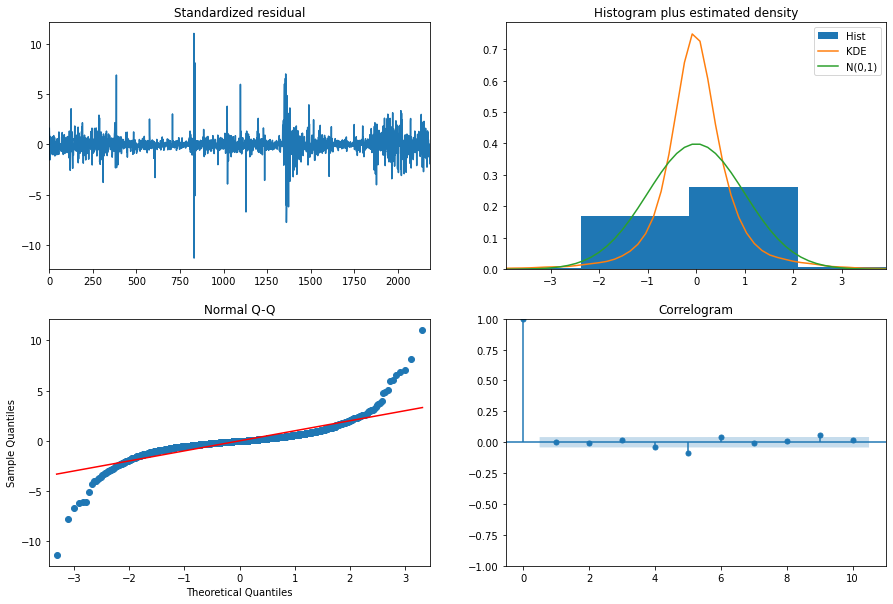

In [56]:
stepwise_fit.plot_diagnostics(figsize=(15,10))
plt.show()

On voit 4 graphiques : 

- Les résidus standardisés : Ils plottent le comportement des résidus standardisés. Si notre modèle est bon, les résidus ne devraient présentés aucun comportement particulier comme de la saisonnalité ou de la tendance. Ils devraient etre juste du bruit.


- Histogram plus estimaded density : Sur ce graphe, nous avons un histogramme, celui des résidus calculés par le modèle. Nous avons également deux courbes : Une courbe verte qui présente la loi normale centrée réduite qui est la loi que doivent suivre normalement **les résidus**. La courbe KDE est la courbe que suivent actuellement nos résidus (version lissée de l'histogramme des résidus). Plus ces deux courbes sont proches voire confondues, plus le modèle est bon.


- Le troisième graphe est la normal Q-Q : Si les résidus suivent vraiment une loi normale centrée et réduite, la courbe en bleue devrait théoriquement etre confondue parfaitement avec la courbe rouge ou pratiquement s'en approcher. Ce qui n'est pas le cas dans notre cas. Nos résidus ne suivent donc pas une loi normale comme le confirme le test de **Jarque-Bera.** Plus la courbe en bleue suit celle en rouge, mieux notre modèle performe bien et mieux les résidus suivent bien une loi normale. 


- Le correlogram : Plot d'autocorrélation entre les erreurs de notre modèle. Comme on peut le voir, les erreurs ne semblent pas etre autocorrelées. Ce qui est confirmé par le test de **Ljung-Box.**


A cette étape, récapitulons comment avons procédé pour modéliser la série temporelle : 

- **Importer et nettoyer la base de donnée** 


- **Visualiser la base de donnée** 


- **Tests de stationnarité et stationnariser la série si elle ne l'est pas déjà** 


- **Tracer des ACF plots et PACF plots de la série temporelle stationnaire** 


- **Modéliser la série temporelle avec les modèles de type $ARMA$ en déterminant l'odre des modèles.**


- **Toujours regarder les résultats de notre modèle après le fitting. Deux tests doivent attirer notre attention : en Python il s'agit de Prob(Q) et de Prob(JB). Si nous ne pouvons pas avoir directement accès aux résultats de Prob(Q) et Prob(JB), il est nécessaire d'importer les fonctions permettant de faire le test avec la librairie statsmodels et le faire manuellement. Toujours visualiser dans cette étape, les résultats de notre modèle pour confirmer les tests. Si ce n'est pas le cas, reprendre depuis la troisième étape. Dans la visualisation, le QQ-plot, le corrélogram, les résidus standardisés et les densités doivent attirer notre attention**

Comme nous venons de le voir, meme en fixant un modèle saisonnal en partant du postulat que tous nos résultats précédents sont faux, en prenant une période de 12, en laissant Python déterminer automatiquement pour nous $d$ et $D$ qui est l'ordre de différentiation saisonnal optimal, on obtient les memes résultats que précédent. La série n'est pas donc saisonnale. Ce qui marque la fin de cette première partie du projet qui est la modélisation $ARMA$. 



**Conclusion : La série temporelle du DJ Itraxx X-over 3Y $\sim$ $ARIMA(0,1,0)$. Selon nos observations, aucun ordre pertinent ne peut etre trouvé pour le représenter par un modèle mathématique classique de série temporelle puisque autocorrélations/partielles significativement nulles. Un modèle hétéroscédastique de type $GARCH$ est donc nécessaire.**

<div class="alert alert-info"><h3>Fonctions utilisées:</h3>
<tt>
<strong>
<a href='https://www.alkaline-ml.com/pmdarima/user_guide.html#user-guide'>pmdarima.auto_arima</a></strong><font color=black>(y[,start_p,d,start_q, …])</font>&nbsp;&nbsp;&nbsp;Retourne l'ordre optimal d'un modèle ARIMA<br>
​
<h3>Autres fonctions intéressantes:</h3>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.arma_order_select_ic.html'>stattools.arma_order_select_ic</a></strong><font color=black>(y[, max_ar, …])</font>&nbsp;&nbsp;Retourne les critères d'information (AIC et BIC) pour plusieurs modèles ARIMA<br><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.x13.x13_arima_select_order.html'>x13.x13_arima_select_order</a></strong><font color=black>(endog[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Implémente une identification automatique de l'ordre saisonnal ($D$) d'un ARIMA en utilisant x12/x13 ARIMA</tt></div>

# 2ÈME PARTIE de la modélisation : MODÉLISATION $GARCH$

Avant d'entamer la partie des modèles $GARCH$ proprement dit, il est important de confirmer un point important. La série temporelle différenciée d'ordre 1 n'étant pas prévisible, si on élève les valeurs de la série différenciée au carré, cette dernière devrait exhiber des autocorrélations/partielles non significativement nulles. C'est la caractéristique meme des séries temporelles financières. En fait, on peut voir la différentiation d'ordre 1 de la série temporelle des spreads de crédit comme la <em>rentabilité des spreads de crédit</em>. Financièrement parlant, cela n'a aucune signification mais dans un sens mathématique, la différentielle d'ordre 1 correspond à un facteur prèt à la rentabilité des spreads de crédit du DJ Itraxx X-over 3Y. Cette propriété particulière est appelée hétéroscédasticité et l'on doit tenir compte d'elle dans la modélisation. Vérifions si cette propriété est présente dans notre série temporelle.

In [57]:
Itraxx['d_squared'] = np.power(Itraxx['d(1)'],2)

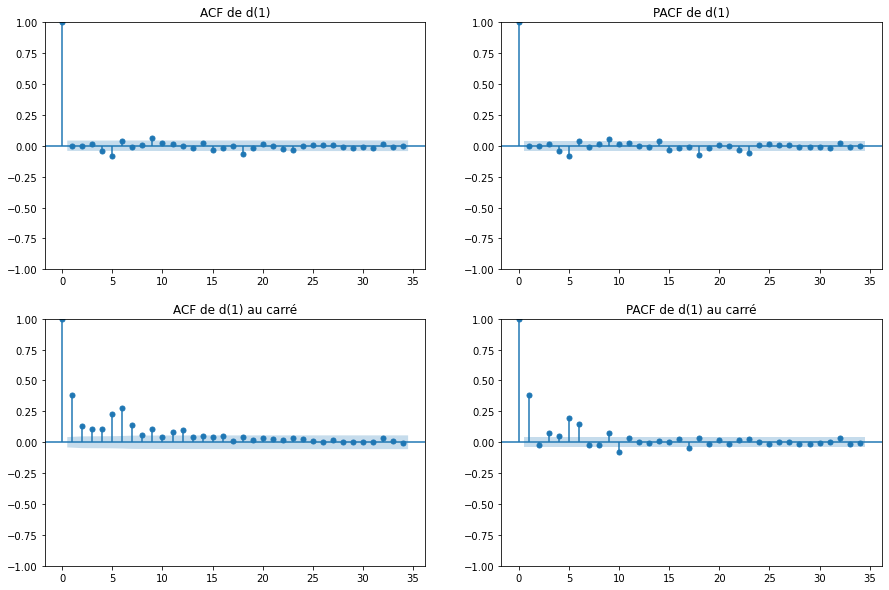

In [58]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

plot_acf(Itraxx['d(1)'].dropna(), alpha=0.05, lags=None, ax=ax[0, 0])
plot_pacf(Itraxx['d(1)'].dropna(), alpha=0.05, lags=None, ax=ax[0, 1])
plot_acf(Itraxx['d_squared'].dropna(), alpha=0.05, lags=None, ax=ax[1, 0])
plot_pacf(Itraxx['d_squared'].dropna(), alpha=0.05, lags=None, ax=ax[1, 1])
ax[0,0].set_title('ACF de d(1)')
ax[0,1].set_title('PACF de d(1)')
ax[1,0].set_title('ACF de d(1) au carré')
ax[1,1].set_title('PACF de d(1) au carré')
plt.show()

On voit indiscutablement que la série au carré des observations de la série différenciée exhibe des autocorrélations/partielles. Ce qui confirme donc notre analyse précédente. Avant d'entamer la modélisation $GARCH$, rappelons quelques faits intéressants sur les séries temporelles financières qui justifièrent l'existence meme de ces modèles et pourquoi jusqu'à présent, ces modèles sont les plus utilisés sur les marchés. 

#### CARACTÉRISTIQUES DES SÉRIES TEMPORELLES FINANCIÈRES 

Les séries temporelles financières exhibent plusieurs propriétés intéressantes qu'il est nécessaire de rappeler avant de passer à la modélisation $ARCH/GARCH$

- **Propriété 1 (Stationnarité):** Les processus stochastiques $p_t$ associés aux prix d'actif sont généralement non stationnaires au sens de la stationnarité du second ordre, tandis que les processus associés aux rendements sont compatibles avec la propriété de stationnarité au second ordre.

   Exemples : 

<img src="stati.png" alt="Transposition of a vector" title="Vector transposition" width="500">

<img src="corr.png" alt="Transposition of a vector" title="Vector transposition" width="500">

Dans notre cas, voici les graphes obtenus : 

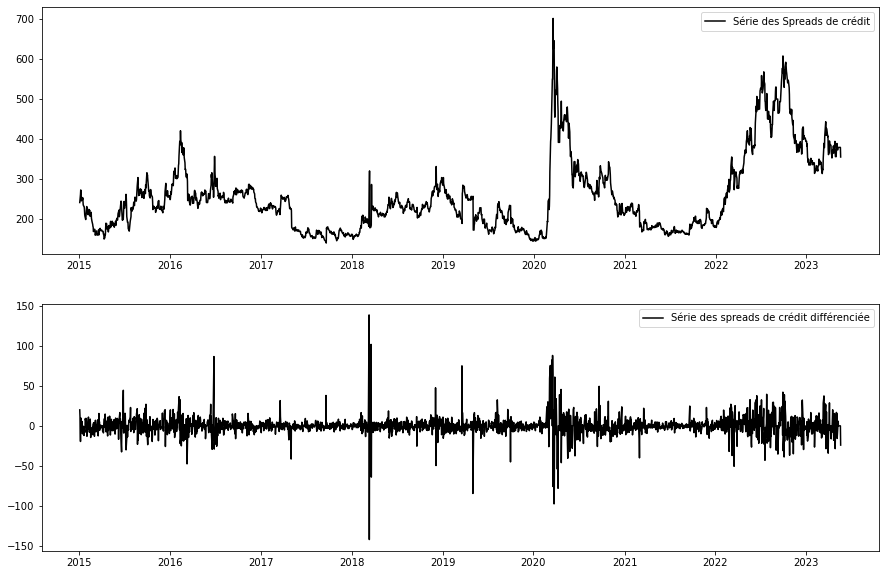

In [59]:
fig, ax = plt.subplots(2,figsize=(15, 10))

ax[0].plot(Itraxx.index,Itraxx['Credit_Spread'],label='Série des Spreads de crédit',color='Black')
ax[1].plot(Itraxx.index,Itraxx['d(1)'],label='Série des spreads de crédit différenciée',color='Black')
ax[0].legend()
ax[1].legend()

plt.show()

- **Propriété 2 (Autocorrélations des carrés des variations de prix):** La série $r_t^2$ associée aux carrés des rendements présente généralement de fortes auto-corrélations tandis que les auto-corrélation de la série $r_t$ sont souvent très faibles (hypothèse de bruit blanc).
 
   Exemple : 

<img src="vs.png" alt="Transposition of a vector" title="Vector transposition" width="500">

Dans notre cas, voici les graphes obtenus :

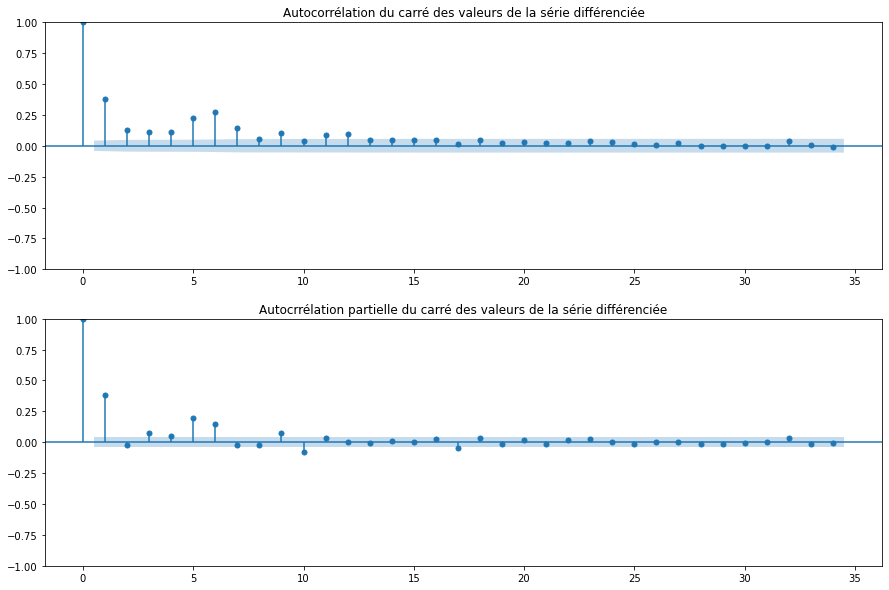

In [60]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 10))

plot_acf(Itraxx['d_squared'].dropna(), alpha=0.05, lags=None, ax=ax1)
plot_pacf(Itraxx['d_squared'].dropna(), alpha=0.05, lags=None, ax=ax2)
ax1.set_title('Autocorrélation du carré des valeurs de la série différenciée')
ax2.set_title('Autocrrélation partielle du carré des valeurs de la série différenciée')

plt.show()

- **Propriété 3 (Queues de distribution épaisses):** L'hypothèse de normalité des rendements est généralement rejetée. Les queues des distributions empiriques des rendements sont généralement plus épaisses que celles d'une loi gaussienne. On parle alors de distribution leptokurtique.


On rappelle que la Kurtosis d'une variable aléatoire $X$ correspond à son moment centré d'ordre 4 , i.e. $\mu_4=E\left[(X-\mu)^4\right]$. La Kurtosis est une mesure de "l'épaisseur" des queues de distributions. En règle générale, on exprime cette mesure en contrôlant par une fonction puissance de la variance $V(X)=\sigma^2$. On définit ainsi une nouvelle mesure: le degré d'excès de Kurtosis.
$$
\text { Degré d'excès de Kurtosis }=E\left[\left(\frac{X-E(X)}{\sigma_x}\right)^4\right]-3
$$
Cette dernière mesure est fondée par rapport à la distribution normale, qui est considérée comme une distribution à queue "plate", et qui possède un degré d'excès de Kurtosis normalisé à 0 . Si la Kurtosis excède 3 (queues épaisses) la distribution est dite leptokurtique, si la Kurtosis est inférieure à 3, la distribution est dite platikurtique. Le moment empirique correspondant au degré d'excès de Kurtosis pour un échantillon de taille $T$ s'écrit:
$$
K_u=\frac{1}{T} \sum_{t=1}^T\left(\frac{x_t-\bar{x}}{\widehat{\sigma}_x}\right)^4
$$
ou $\widehat{\sigma}_x$ désigne un estimateur non biaisé de la variance. Sous l'hypothèse nulle de normalité, on montre que:
$$
\frac{K_u-3}{\sqrt{\frac{24}{T}}} \underset{T \rightarrow \infty}{\stackrel{\mathcal{L}}{\longrightarrow}} \mathcal{N}(0,1)
$$
On vérifie ici que la kurtosis est largement et significativement supérieure à 3 , impliquant l'existence d'une distribution leptokurtique des rendements des cours boursiers. Naturellement, un test de Jarque-Bera conduit rejetera très largement l'hypothèse d'une distribution normale. Rappelons que ce test qui admet pour hypothèse nulle la normalité de la distribution est construit de la façon suivante:
$$
s=\frac{T}{6} S_k+\frac{T}{24}\left(K_u-3\right)^2 \underset{T \rightarrow \infty}{\stackrel{\mathcal{L} / H_0}{\longrightarrow}} \mathcal{X}^2(2)
$$
où $S_k$ désigne la Skewness $S_k$ qui sous l'hypothèse de symétrie est égale à 0 .

Exemple : 

<img src="kurt.png" alt="Transposition of a vector" title="Vector transposition" width="500">


Dans notre cas, voici les graphes et calculs obtenus : 

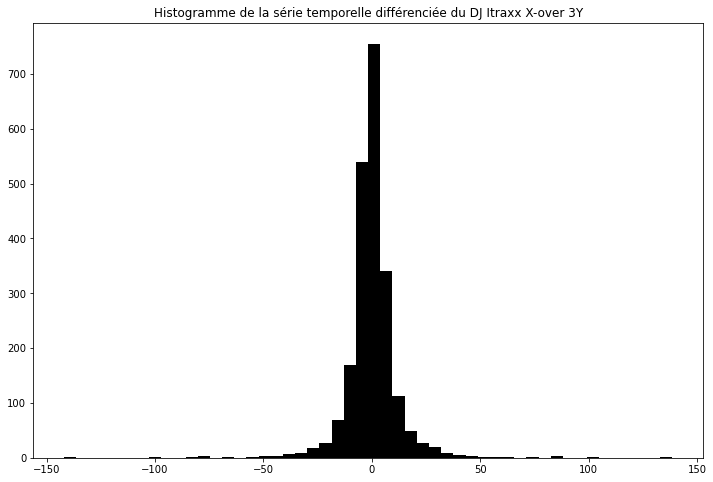

In [61]:
fig , ax = plt.subplots(figsize=(12,8))
ax.hist(Itraxx['d(1)'],color='Black',bins=50)
ax.set_title('Histogramme de la série temporelle différenciée du DJ Itraxx X-over 3Y')
plt.show()

In [62]:
pd.DataFrame({'mean':Itraxx['d(1)'].mean(),
             'median':Itraxx['d(1)'].median(),
             'maximum':Itraxx['d(1)'].max(),
             'minimum':Itraxx['d(1)'].min(),
             'std. dev':Itraxx['d(1)'].std(),
             'skewness':Itraxx['d(1)'].skew(),
             'kurtosis':Itraxx['d(1)'].kurtosis()},index=[0]).T.rename(columns={0:'Values'})

,Values
mean,0.052092
median,0.000000
maximum,138.634388
minimum,-142.084388
std. dev,12.550449
skewness,0.211472
kurtosis,26.195941


- **Propriété 4 (Clusters de Volatilité):** On observe empiriquement que de fortes variations des rendements sont généralement suivies de fortes variations. On assiste ainsi à un regroupement des extrêmes en cluster ou paquets de volatilités.

  Exemple : 

<img src="cluster.png" alt="Transposition of a vector" title="Vector transposition" width="500">

Dans notre cas, voici le graphe obtenu : 

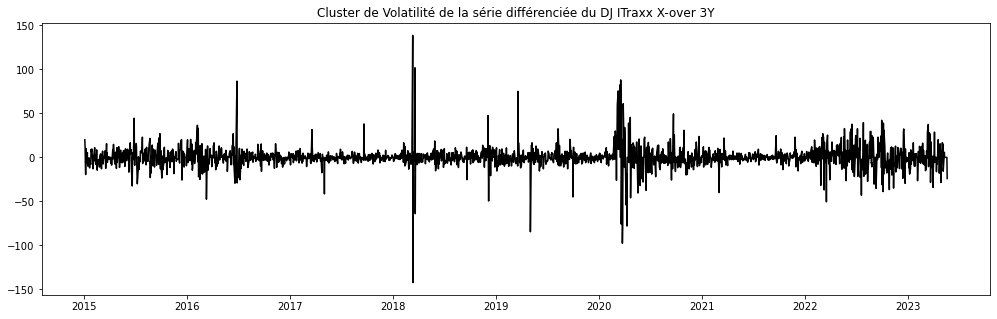

In [63]:
fig , ax  = plt.subplots(figsize=(17,5))
ax.plot(Itraxx.index,Itraxx['d(1)'],color='Black')
ax.set_title('Cluster de Volatilité de la série différenciée du DJ ITraxx X-over 3Y')
plt.show()

- **Propriété 5 (Queues épaisses conditionnelles):** Même une fois corrigée de la volatilité clustering (par exemple avec des modèles ARCH), la distribution des résidus demeure leptokurtique même si la kurtosis est plus faible que dans le cas non conditionnelle.


- **Propriété 6 (Effet de levier):** Il existe une asymétrie entre l'effet des valeurs passées négatives et l'effet des valeurs passées positives sur la volatité des cours ou de rendements. Les baisses de cours tendent à engendrer une augmentation de la volatilité supérieure à celle induite par une hausse des cours de même ampleur.



- **Propriété 7 (Saisonnalité):** Les returns présentent de nombreux phénomènes de saisonnalité (effets week end, effet janvie etc..).Il existe une littérature très abondante qui tend à mettre en évidence de tels phénomènes. 
Autre saisonnalité prononcée : l"effet" week end" étudié notamment par French (1980) ou Gibbon et Hess (1981). Il s'agit plus généralement d'un effet jour de la semaine. Le phénomène le plus marquant est la différence entre les prix de clôture du vendredi et les cours d'ouverture du lundi. L'explication de ce phénomène est délicate. Une piste avancée consiste à postuler que lorsque les entreprises ont de mauvaises nouvelles à annoncer, elles le font généralement le week end. Mais cette explication est a priori peu convaincante.


<img src="week.png" alt="Transposition of a vector" title="Vector transposition" width="700">  





- **Propriété 8 (Asymétrie perte/gain):** La distribution des cours est généralement asymétrique : il y a plus de mouvements forts à la baisse qu'à la hausse.
Rappelons qu'un test simple de l'hypothèse de symétrie consiste à tester la nullité du moment centré d'ordre trois de la distribution, i.e. la skweness.
$$
\text { Skewness }=\mu_3=E\left[(X-E(X))^3\right]
$$
Souvent on construit un coefficient de Skewness définit comme le rapport $S_K=$ $\mu_3^2 / \sigma^3$. Sous l'hypothèse nulle de distribution normale et donc par conséquent de symétrie, on montre que:
$$
\frac{\left(S_k\right)^{1 / 2}}{\sqrt{\frac{6}{T}}} \underset{T \rightarrow \infty}{\stackrel{\mathcal{L}}{\longrightarrow}} \mathcal{N}(0,1)
$$
On vérifie ainsi aisément que l'hypothèse nulle de symétrie de la distribution des rendements des actions est rejetée : le coefficient de skewness est significativement négative, dès lors la distribution est non symétrique, la probabilité d'obtenir des valeurs inférieures à la moyenne étant supérieure à celle d'obtenir des valeurs plus fortes que la moyenne. On retrouve la propriété d'asymétrie aux pertes et gains.

Dans le cas de notre étude, la différentiation d'ordre 1 correspond approximativement à un facteur pret à la rentabilité des spreads de crédit du DJ Itraxx X-over 3Y. Par conséquent, juste avec les graphes des autocorrélations/partielles qui exhibent la deuxième propiété et le graphe de la série temporelle différenciée qui exhibe clairement la propriété 4 des clusters de volatilité, on voit que notre série doit etre modélisée avec une approche $ARCH/GARCH$. Cependant, avant de rentrer dans le vif du sujet de modélisation, il est important de se poser plusieurs questions fondamentales : Qu'est ce qu'un modèle $ARCH$ ? Quels sont ces propriétés fondamentales qui reproduisent les faits observés des rendements des actifs sur le marché ? Quelles sont ses faiblesses notables qui ont favorisé l'émergence des modèles $GARCH$ en finance ? 

**Définition et caractéristiques des modèles $ARCH$**


$\mathbf{A R C H}=$ **A**uto**R**egressive **C**onditional **H**eteroskedasticity

- Le terme hétéroscédasticité se réfère à une variance qui varie dans le temps.


- Dans un modèle ARCH, c'est la variance conditionnelle (et non la variance elle-même) qui change avec le temps, de manière spécifique, en fonction des données disponibles.


- Le modèle ARCH suppose que la variance conditionnelle est une fonction linéaire du carré du rendement passé.


Ainsi, le carré du rendement suit un modèle autorégressif.


**Définition du modèle $ARCH(1)$**

On dit que le processus $\left\{X_t, t \in \mathbb{Z}\right\}$ suit un processus $A R C H(1)$, si
$$
X_t=Z_t \sigma_t
$$
ou $Z_t$ est une séquence de variables aléatoires independante et indentiquement distribuée (i.i.d.) avec $\mathbb{E}\left(Z_t\right)=0$ et $\mathbb{V}\left(Z_t\right)=1$, et $\sigma_t$ est un processus non négatif tel que
$$
\sigma_t^2=\alpha_0+\alpha_1 X_{t-1}^2
$$
avec $\alpha_0>0$ et $0 \leq \alpha_1<1$



**Variance Conditionnelle d'un modèle $ARCH(1)$**

Le processus $\sigma_t^2$ correspond à la variance conditionnelle de $X_t$.
\begin{equation*}
\mathbb{V}\left(X_t \mid \mathcal{F}_{t-1}\right) \equiv \mathbb{V}\left(X_t \mid \underline{X}_{t-1}\right)=\sigma_t^2
\end{equation*}
où $\mathcal{F}_{t-1} \equiv \underline{X}_{t-1}=\left\{X_{t-1}, X_{t-2}, \ldots\right\}$ est l'ensemble d'informations disponibles à l'instant $t-1$.

Certains auteurs désignent la variance conditionnelle par $h_t$, avec
\begin{align*}
X_t &= Z_t \sqrt{h_t} \\
h_t &= \alpha_0 + \alpha_1 X_{t-1}^2
\end{align*}

<em>Interprétation</em> 

Considérons un processus $ARCH(1)$
\begin{gather*}
X_t=Z_t \sigma_t \\
\sigma_t^2=\alpha_0+\alpha_1 X_{t-1}^2
\end{gather*}
Alors, nous avons
\begin{align*}
\mathbb{V}\left(X_t \mid \underline{X}_{t-1}\right) &= \mathbb{V}\left(Z_t \sigma_t \mid \underline{X}_{t-1}\right)\\
&= \sigma_t^2 \mathbb{V}\left(Z_t \mid \underline{X}_{t-1}\right)\\
&= \sigma_t^2 \mathbb{V}\left(Z_t\right)\\
&= \sigma_t^2
\end{align*}

- (1) Étant donné l'information passée $\underline{X}_{t-1}$, la variance conditionnelle $\sigma_t^2=\alpha_0+\alpha_1 x_{t-1}^2$ est déterministe, puisque $x_{t-1}$ est une constante.

- (2) Le processus $\left\{Z_t, t \in \mathbb{Z}\right\}$ est un bruit IID (cf. Chapitre 5), donc $\mathbb{V}\left(Z_t \mid \underline{X}_{t-1}\right)=\mathbb{V}\left(Z_t\right)$, c'est-à-dire qu'il n'y a pas de "mémoire" dans $Z_t$.

- (3) La normalisation $\mathbb{V}\left(Z_t\right)=1$ n'est pas une restriction : l'échelle implicite par toute autre variance serait absorbée par les paramètres $\alpha_0$ et $\alpha_1$.


**Propriétés fondamentales du modèle $ARCH(1)$**

**Propriété 1** : Si $\left\{X_t, t \in \mathbb{Z}\right\}$ a une représentation $A R C H(1)$, avec
\begin{gather*}
X_t=Z_t \sigma_t \\
\sigma_t^2=\alpha_0+\alpha_1 X_{t-1}^2
\end{gather*}
alors $\left\{X_t^2, t \in \mathbb{Z}\right\}$ a une représentation $A R(1)$, avec
\begin{equation*}
X_t^2=\alpha_0+\alpha_1 X_{t-1}^2+v_t
\end{equation*}
où $v_t$ est un processus d'innovation
\begin{equation*}
\mathbb{E}\left(v_t \mid \underline{X}_{t-1}\right)=0
\end{equation*}


**Preuve** : Considérons un modèle $ARCH(1)$ tel que
\begin{gather*}
X_t=z_t \sigma_t \\
\sigma_t^2=\alpha_0+\alpha_1 X_{t-1}^2
\end{gather*}
Ajoutez $X_t^2$ des deux côtés de l'équation de $\sigma_t^2$, alors nous obtenons
\begin{equation*}
X_t^2+\sigma_t^2=\alpha_0+\alpha_1 X_{t-1}^2+X_t^2
\end{equation*}
et réécrivez $X_t^2$ comme
\begin{equation*}
X_t^2=\alpha_0+\alpha_1 X_{t-1}^2+v_t
\end{equation*}
avec
\begin{equation*}
v_t=X_t^2-\sigma_t^2
\end{equation*}

**2ème étape** : Pour Montrer que $v_t=X_t^2-\sigma_t^2$ est une innovation, c'est-à-dire $\mathbb{E}\left(v_t \mid \underline{X}_{t-1}\right)=0$.
\begin{align*}
\mathbb{E}\left(v_t \mid \underline{X}_{t-1}\right) & =\mathbb{E}\left(X_t^2 \mid \underline{X}_{t-1}\right)-\mathbb{E}\left(\sigma_t^2 \mid \underline{X}_{t-1}\right) \\
& =\mathbb{E}\left(z_t^2 \sigma_t^2 \mid \underline{X}_{t-1}\right)-\sigma_t^2 \\
& =\sigma_t^2 \mathbb{E}\left(z_t^2 \mid \underline{X}_{t-1}\right)-\sigma_t^2 \\
& =\sigma_t^2 \mathbb{V}\left(z_t \mid \underline{X}_{t-1}\right)-\sigma_t^2 \\
& =\sigma_t^2 \mathbb{V}\left(z_t\right)-\sigma_t^2 \\
& =\sigma_t^2-\sigma_t^2 \\
& =0
\end{align*}
Donc, $X_t^2$ a une représentation $AR(1)$.


**Conséquences**

(1) Si $\left\{X_t, t \in \mathbb{Z}\right\}$ a une représentation $A R C H(1)$
\begin{gather*}
X_t=z_t \sigma_t \\
\sigma_t^2=\alpha_0+\alpha_1 X_{t-1}^2
\end{gather*}
(2) Alors $\left\{X_t^2, t \in \mathbb{Z}\right\}$ a une représentation $\operatorname{AR}(1)$
\begin{equation*}
X_t^2=\alpha_0+\alpha_1 X_{t-1}^2+v_t
\end{equation*}
(3) Ainsi $X_t^2$ et $X_{t-k}^2$ sont corrélés : $=>$ Effet ARCH
\begin{equation*}
\rho_k=\operatorname{Corr}\left(X_t^2, X_{t-k}^2\right) \neq 0
\end{equation*}
surtout pour les petites valeurs de $k$.

Ce résultat est très important : car il nous **permet de lier directement les propriétés du modèle $ARCH(1)$ aux propriétés réelles des séries temporelles financières observées dans la pratique.**

**<em>Fait 1 : Le modèle $ARCH(1)$ reproduit mathématiquement avec fidélité les seconde et quatrième propiétés énoncées précédemment sur les séries temporelles financières</em> :
Les rendements carrés quotidiens présentent souvent des corrélations significatives. Ces autocorrélations sont souvent désignées comme un effet $A R C H$. Ensuite nous avons un cluster de volatilité puisque \begin{equation*}
\rho_k=\operatorname{Corr}\left(X_t^2, X_{t-k}^2\right) \neq 0
\end{equation*} En effet, vu que la corrélation n'est pas nulle, une forte variation du carré du rendement s'ensuit immédiatement d'une autre forte variation du carré du rendement à un instant différent et vice versa. C'est ce qui explique que visuellement, l'on a des clusters ou groupes ou l'on a une forte volatilité et une autre partie du graphe ou l'on a une faible volatilité.**




**Propriété 2:** si $\left\{X_t, t \in \mathbb{Z}\right\}$ est un processus $A R C H(1)$, alors c'est une différence de martingale
\begin{equation*}
\mathbb{E}\left(X_t \mid \mathcal{F}_{t-1}\right) \equiv \mathbb{E}\left(X_t \mid \underline{X}_{t-1}\right)=0
\end{equation*}


**Preuve:** Considérons un modèle $ARCH(1)$ tel que

\begin{equation}
\begin{gathered}
X_t=Z_t \sigma_t \\
\sigma_t^2=\alpha_0+\alpha_1 X_{t-1}^2
\end{gathered}
\end{equation}
Il est possible de montrer que $X_t$ est une différence de martingales, car
\begin{align*}
\mathbb{E}\left(X_t \mid \underline{X}_{t-1}\right) & =\mathbb{E}\left(Z_t \sigma_t \mid \underline{X}_{t-1}\right) \\
& =\sigma_t \mathbb{E}\left(Z_t \mid \underline{X}_{t-1}\right) \\
& =\sigma_t \mathbb{E}\left(Z_t\right) \\
& =0 \square
\end{align*}
car comme $Z_t$ est un processus i.i.d., $\mathbb{E}\left(Z_t\right)=0$.


**Conséquences**
- Le meilleur prédicteur (linéaire ou non linéaire) de $X_t$ basé sur l'information disponible à l'instant $t-1$ est simplement le prédicteur trivial, à savoir la moyenne de la série, 0 .
- En termes de prévision ponctuelle de la série elle-même, les modèles $ARCH$ n'offrent donc aucun avantage par rapport aux modèles $ARMA$ linéaires.
- Cette propriété implique que $\operatorname{Cov}\left(X_t, X_{t-k}\right)=0$ pour $k \neq 0$, c'est-à-dire que le processus $X_t$ n'a pas de "mémoire".




**<em>Fait 2 : Le modèle $ARCH(1)$ reproduit mathématiquement avec fidélité une propriété visuelle des séries temporelles financières et la seconde propriété énoncée précédemment sur les séries temporelles financières</em> : La moyenne de $X_t$ étant nulle, on voit graphiquement indiscutablement que les rendements des actifs auscillent autour de l'axe des abscisses qui correspond toujours 0. Le modèle $ARCH(1)$ reproduit donc mathématiquement la propriété visuelle de moyenne nulle des rendements des actifs. Ensuite, les autocorrélations des rendements d'actifs $r_t$ sont souvent non significatives, sauf pour de très petites échelles de temps intrajournalières $(\approx 20$ minutes) pour lesquelles les effets de microstructure entrent en jeu. Le modèle reproduit donc la seconde propriété des rendements des actifs.**




**Propriété 3:** si $\left\{X_t, t \in \mathbb{Z}\right\}$ est un processus $A R C H(1)$ avec
\begin{equation}
\begin{gathered}
X_t=Z_t \sigma_t \\
\sigma_t^2=\alpha_0+\alpha_1 X_{t-1}^2
\end{gathered}
\end{equation}
alors, ses deux premiers moments inconditionnels sont égaux à
\begin{equation}
\mathbb{E}\left(X_t\right)=0 \quad \mathbb{V}\left(X_t\right)=\frac{\alpha_0}{1-\alpha_1}
\end{equation}
avec $\alpha_0>0$ et $0 \leq \alpha_1<1$

**Preuve:** Considérons un modèle $ARCH(1)$ tel que
\begin{equation}
\begin{gathered}
X_t=Z_t \sigma_t \\
\sigma_t^2=\alpha_0+\alpha_1 X_{t-1}^2
\end{gathered}
\end{equation}
La moyenne (inconditionnelle) de $X_t$ est définie par
\begin{align*}
\mathbb{E}\left(X_t\right) & =\mathbb{E}\left(Z_t \sigma_t\right) \\
& =\mathbb{E}\left(\mathbb{E}\left(Z_t \sigma_t \mid \underline{X}_{t-1}\right)\right) \\
& =\mathbb{E}\left(\sigma_t \mathbb{E}\left(Z_t \mid \underline{X}_{t-1}\right)\right) \\
& =\mathbb{E}\left(\sigma_t \times 0\right) \\
& =0 \square
\end{align*}

**2ème étape**

\begin{equation}
\begin{gathered}
X_t=Z_t \sigma_t \\
\sigma_t^2=\alpha_0+\alpha_1 X_{t-1}^2
\end{gathered}
\end{equation}
Calculons la variance inconditionnelle de $X_t$. Puisque $\mathbb{E}\left(X_t\right)=0$, nous avons
\begin{equation}
\mathbb{V}\left(X_t\right)=\mathbb{E}\left(X_t^2\right)
\end{equation}
Nous savons que $X_t^2$ a une représentation $\operatorname{AR}(1)$ avec
\begin{equation}
X_t^2=\alpha_0+\alpha_1 X_{t-1}^2+v_t \Longleftrightarrow \Phi(L) X_t^2=\alpha_0+v_t
\end{equation}
avec $\Phi(L)=1-\alpha_1$. Alors, nous avons
\begin{equation}
\mathbb{V}\left(X_t\right)=\mathbb{E}\left(X_t^2\right)=\alpha_0 \Phi(1)^{-1}=\frac{\alpha_0}{1-\alpha_1}
\end{equation}



**Conséquences**
- (1) Un processus $ARCH(1)$ est inconditionnellement homoscédastique. La variance inconditionnelle $\mathbb{V}\left(X_t\right)=\frac{\alpha_0}{1-\alpha_1}=$ constante $\forall t$
- (2) Un processus $ARCH(1)$ est conditionnellement hétéroscédastique.La variance conditionnelle $\mathbb{V}\left(X_t \mid \mathcal{F}_{t-1}\right)=\sigma_t^2=\alpha_0+\alpha_1 X_{t-1}^2$ varie avec $\mathcal{F}_{t-1}$
- (3) Si $\alpha_1<1$, les deux premiers moments d'un processus $ARCH(1)$ sont finis et constants
\begin{align*}
& \mathbb{E}\left(X_t\right)=0 \quad \gamma(0)=\mathbb{V}\left(X_t\right)=\frac{\alpha_0}{1-\alpha_1} \\
& \gamma(k)=\mathbb{C o v}\left(X_t, X_{t-k}\right)=0 \quad \text { pour } k \neq 0
\end{align*}
et, le processus $ARCH(1)$ est (faiblement) stationnaire.



**<em>Fait 3 : Le modèle $ARCH(1)$ reproduit mathématiquement avec fidélité la première propiété énoncée précédemment sur les séries temporelles financières</em> :
En général, le prix des actifs sur le marché sont non stationnaires ( dans notre cas, il s'agit des spreads de crédit ) tandis que les rendements $r_t$ eux stationnaires ( spread de crédit stationnarisés d'ordre 1 ).**



**Propriété 4 :** Si $\left\{X_t, t \in \mathbb{Z}\right\}$ est un processus $A R C H(1)$ avec des innovations gaussiennes $Z_t \stackrel{i . i . d}{\sim} \mathcal{N}(0,1)$, alors, ses quatrièmes moments conditionnels et inconditionnels sont égaux à
\begin{align*}
\mathbb{E}\left(X_t^4 \mid \underline{X}_{t-1}\right)&=3\left(\alpha_0+\alpha_1 X_{t-1}^2\right)^2=3 \sigma_t^4 \\
\mathbb{E}\left(X_t^4\right)&=\frac{3 \alpha_0^2\left(1+\alpha_1\right)}{\left(1-3 \alpha_1^2\right)\left(1-\alpha_1\right)}
\end{align*}

**Corollaire**
Si $\left\{X_t, t \in \mathbb{Z}\right\}$ est un processus $A R C H(1)$ avec des innovations gaussiennes $Z_t \stackrel{\text { i.i.d. }}{\sim} \mathcal{N}(0,1)$, alors, ses coefficients de Kurtosis conditionnels et inconditionnels sont égaux à
\begin{align*}
\mathbb{K}\left(X_t^4 \mid \underline{X}_{t-1}\right)&=\frac{\mathbb{E}\left(X_t^4 \mid \underline{X}_{t-1}\right)}{\left(\mathbb{V}\left(X_t \mid \underline{X}_{t-1}\right)\right)^2}=3 \\
\mathbb{K}\left(X_t\right)&=\frac{\mathbb{E}\left(X_t^4\right)}{\left(\mathbb{V}\left(X_t\right)\right)^2}=3\left(\frac{1-\alpha_1^2}{1-3 \alpha_1^2}\right)>3 \quad \text { si } \alpha_1^2<1 / 3
\end{align*}



**Conséquences**

- (1) Même si l'innovation $Z_t$ suit une distribution normale, la distribution marginale de $X_t$ n'est pas gaussienne car
$X_t \sim$ distribution inconnue avec
\begin{align*}
\mathbb{E}\left(X_t\right)&=0 \\
\mathbb{V}\left(X_t\right)&=\frac{\alpha_0}{1-\alpha_1} \\
\mathbb{S}\left(X_t\right)&=0 \\
\mathbb{K}\left(X_t\right)&=3\left(\frac{1-\alpha_1^2}{1-3 \alpha_1^2}\right)>3 \text{ si } \alpha_1^2<1 / 3
\end{align*}


- (2) Si l'innovation $Z_t$ suit une distribution normale, la distribution conditionnelle de $X_t$ est gaussienne
\begin{align*}
X_t \mid \underline{X}_{t-1} &\sim \mathcal{N}\left(0, \sigma_t^2\right) \\
\mathbb{E}\left(X_t \mid \underline{X}_{t-1}\right)&=0 \\
\mathbb{V}\left(X_t \mid \underline{X}_{t-1}\right)&=\sigma_t^2=\alpha_0+\alpha_1 X_{t-1}^2 \\
\mathbb{S}\left(X_t \mid \underline{X}_{t-1}\right)&=0 \\
\mathbb{K}\left(X_t \mid \underline{X}_{t-1}\right)&=3
\end{align*}

**Preuve:** Considérons un modèle $\mathrm{ARCH}(1)$ tel que
\begin{align*}
X_t&=Z_t \sigma_t \\
\sigma_t^2&=\alpha_0+\alpha_1 X_{t-1}^2
\end{align*}
Alors, nous avons
\begin{align*}
\mathbb{E}\left(X_t^4 \mid \underline{X}_{t-1}\right) &=\mathbb{E}\left(Z_t^4 \sigma_t^4 \mid \underline{X}_{t-1}\right) \\
&=\mathbb{E}\left(Z_t^4 \mid \underline{X}_{t-1}\right) \sigma_t^4 \\
&=\mathbb{E}\left(Z_t^4\right)\left(\sigma_t^2\right)^2
\end{align*}
Si $Z_t \stackrel{i . i . d .}{\sim} \mathcal{N}(0,1)$, alors $\mathbb{K}\left(Z_t\right)=\mathbb{E}\left(Z_t^4\right) / 1^2=3$, ou équivalemment $\mathbb{E}\left(Z_t^4\right)=3$. Ainsi, nous obtenons
\begin{align*}
\mathbb{E}\left(X_t^4 \mid \underline{X}_{t-1}\right)=3 \sigma_t^4
\end{align*}


Nous avons 
\begin{align*}
\mathbb{E}\left(X_t^4\right) &=\mathbb{E}\left(\mathbb{E}\left(X_t^4 \mid \underline{X}_{t-1}\right)\right) \\
&=3 \mathbb{E}\left(\left(\alpha_0+\alpha_1 X_{t-1}^2\right)^2\right) \\
&=3\left(\alpha_0^2+2 \alpha_0 \alpha_1 \mathbb{E}\left(X_{t-1}^2\right)+\alpha_1^2 \mathbb{E}\left(X_{t-1}^4\right)\right) \\
&=3\left(\alpha_0^2+\frac{2 \alpha_0^2 \alpha_1}{1-\alpha_1}+\alpha_1^2 \mathbb{E}\left(X_{t-1}^4\right)\right) \\
&=3 \alpha_0^2\left(\frac{1+\alpha_1}{1-\alpha_1}\right)+3 \alpha_1^2 \mathbb{E}\left(X_{t-1}^4\right)
\end{align*}
Si $X_t$ est stationnaire d'ordre quatre, alors $\mathbb{E}\left(X_t^4\right)=\mathbb{E}\left(X_{t-1}^4\right)$ et nous obtenons
\begin{align*}
\mathbb{E}\left(X_t^4\right)=\frac{3 \alpha_0^2\left(1+\alpha_1\right)}{\left(1-3 \alpha_1^2\right)\left(1-\alpha_1\right)}
\end{align*}


Nous avons
\begin{align*}
\mathbb{E}\left(X_t^4 \mid \underline{X}_{t-1}\right)&=3 \sigma_t^4 \\
\mathbb{V}\left(X_t \mid \underline{X}_{t-1}\right)&=\sigma_t^2
\end{align*}
Le coefficient de Kurtosis conditionnel est égal à
\begin{align*}
\mathbb{K}\left(X_t^4 \mid \underline{X}_{t-1}\right)=\frac{\mathbb{E}\left(X_t^4 \mid \underline{X}_{t-1}\right)}{\left(\mathbb{V}\left(X_t \mid \underline{X}_{t-1}\right)\right)^2}=\frac{3 \sigma_t^4}{\sigma_t^4}=3
\end{align*}
La distribution conditionnelle est mésokurtique.

 Nous avons
\begin{align*}
\mathbb{E}\left(X_t^4\right)&=\frac{3 \alpha_0^2\left(1+\alpha_1\right)}{\left(1-3 \alpha_1^2\right)\left(1-\alpha_1\right)} \\
\mathbb{V}\left(X_t\right)&=\frac{\alpha_0}{1-\alpha_1}
\end{align*}
Le coefficient de Kurtosis inconditionnel est égal à
\begin{align*}
\mathbb{K}\left(X_t^4\right)&=\frac{\mathbb{E}\left(X_t^4\right)}{\left(\mathbb{V}\left(X_t\right)\right)^2} \\
&=\frac{3 \alpha_0^2\left(1+\alpha_1\right)}{\left(1-3 \alpha_1^2\right)\left(1-\alpha_1\right)} \frac{\left(1-\alpha_1\right)^2}{\alpha_0^2} \\
&=3\left(\frac{1-\alpha_1^2}{1-3 \alpha_1^2}\right)>3
\end{align*}
La Kurtosis est finie et positive dès que $\alpha_1^2<1 / 3$. De plus, la distribution conditionnelle est leptokurtique.


**<em>Fait 4 : Le modèle $ARCH(1)$ reproduit mathématiquement avec fidélité les troisième et cinquième propriétés énoncées précédemment sur les séries temporelles financières</em> :
La distribution des rentabilités exhibe souvent des queues épaisses que ceux d'une distribution normale**

Dans les lignes de code suivantes, nous allons implémenter un modèle $ARCH(1)$ avec Python. Nous allons pour ce faire utiliser la librairie <a href='https://pypi.org/project/arch/'>arch</a> qui est l'une des plus utilisées de ce langage et qui propose pas mal de fonctionnalités très intéressantes. Notons que les lignes de codes qui suivent sont à titre d'exemple. Elles nous servent seulement pour comprendre comment utiliser la librairie. Plus tard avec les modèles $GARCH$, nous verrons une méthodologie plus robuste pour d'une part modéliser et prédire la série des spreads de crédit du DJ Itraxx X-over 3Y, pourquoi il est important d'utiliser les modèles $GARCH$ et les faiblesses des modèles $ARCH$.


Pour modéliser en Python, nous devons suivre une procédure classique obligatoire que l'on rencontre à peu près dans tous les packages de machine learning ou statistiques. Cette procédure se déroule toujours en 3 étapes : 

-  On instancie le modèle ou on compile le modèle ; 

-  On fit le modèle sur la donnée avec la fonction **.fit()** ; 

-  Le troisième cas dépend du package utilisé : En statistiques par exemple, on regarde et on analyse les résultats au moyen des p-values en exhibant le résumé ou summary du modèle pour conclure si le modèle a bien fitté les données ou pas. En machine learning, on étudie la performance de notre modèle sur la base de test et en deep learning, on hyperparamètre le modèle ou réajuste les mini-batchs, etc..

In [64]:
from arch import arch_model

In [65]:
arch_1 = arch_model(Itraxx['d(1)'].dropna(),p=1,mean='constant',vol='ARCH',dist='normal') # instanciation 

arch_1_results = arch_1.fit(disp='off')  # fit du modèle 

In [66]:
arch_1_results.summary()  # summary du modèle

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                   d(1)   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8372.08
Distribution:                  Normal   AIC:                           16750.2
Method:            Maximum Likelihood   BIC:                           16767.2
                                        No. Observations:                 2185
Date:                Sun, Jun 25 2023   Df Residuals:                     2184
Time:                        16:36:22   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0892      0.405      0.221      0.825 [ -0.704,  0.882]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         87.5244     15.264      5.734  9.808e-09 [ 57.607,1.174e+02]
alpha[1]       0.6186      0.165      3.759  1.709e-04   [  0.296,  0.941]
==========================================================================

Covariance estimator: robust
"""

<div class="alert alert-info"><h3>Fonction utilisée:</h3>
<tt>
<strong>
<a href='https://arch.readthedocs.io/en/latest/univariate/introduction.html#'>arch.arch_model</a></strong><font color=black>(y,x=None,...)</font>&nbsp;&nbsp;&nbsp;Modélise une base de donnée avec des modèles ARCH/GARCH<br>


On voit que le package arch nous retourne un résultat agréable à analyser et à interpréter comme le package pmdarima et statsmodels. Comment fait on alors pour savoir si le modèle $ARCH(1)$ a bien fitté nos données ? Nous devons faire les tests statistiques classiques vus précédemment. Contrairement a la librairie pmdarima, la librairie arch ne nous donne pas accès directement à **Prob(Q)** et **Prob(JB)**. Il nous faut donc les importer manuellement. 


Pour ce faire, accédons d'abord aux résidus du modèle $ARCH(1)$ en Python. Cela se fait facilement en 1 seule ligne de code: 

In [67]:
arch_1_results.resid

Date
2015-01-05    19.91078
2015-01-06    11.41078
2015-01-07    -8.08922
2015-01-08   -19.58922
2015-01-09     9.91078
                ...   
2023-05-15    -0.08922
2023-05-16    -0.08922
2023-05-17    -0.07922
2023-05-18    -0.07922
2023-05-19   -24.12922
Freq: B, Name: resid, Length: 2185, dtype: float64

Ensuite,  **visualisons** et  plottons l'acf de ces résidus : 

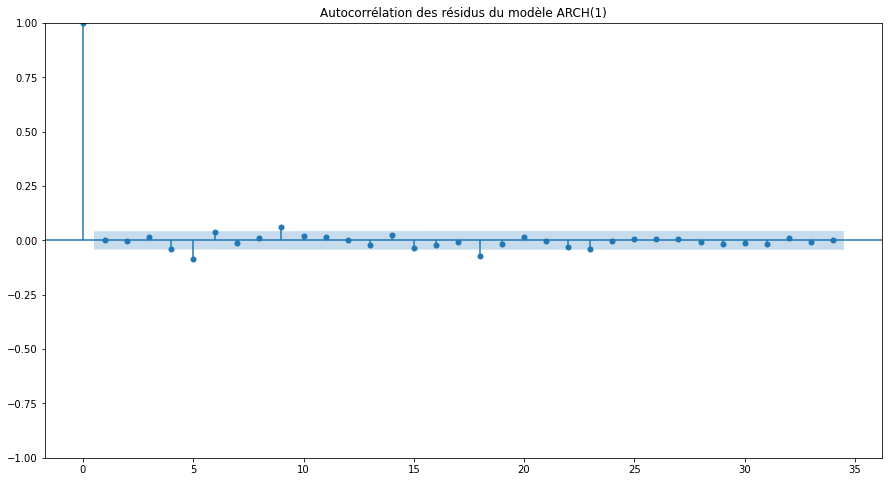

In [68]:
fig , ax = plt.subplots(figsize=(15,8))
plot_acf(arch_1_results.resid,alpha=0.05,lags=None,ax = ax)
ax.set_title('Autocorrélation des résidus du modèle ARCH(1)')
plt.show()

On voit qu'il ya certaines autocorrélations qui sortent de manière claire de la bande bleue. Par conséquent, le modèle $ARCH(1)$ ne semble pas etre un bon modèle puisque visiblement, il ne capte pas toute l'information contenue dans les données du DJ ITraxx X-over 3Y. Qu'en est t'il du test de **Ljung-Box** ? Faisons le manuellement. 

In [69]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [70]:
acorr_ljungbox(arch_1_results.resid , lags = 10, return_df = True)

,lb_stat,lb_pvalue
1,0.001333,0.970873
2,0.015300,0.992379
3,0.643546,0.886395
4,4.119707,0.390048
5,20.354700,0.001072
6,23.911484,0.000542
7,24.124760,0.001083
8,24.323658,0.002022
9,32.700003,0.000151
10,33.516362,0.000223


La seconde colonne elle, concerne les p-values. On voit qu'à partir du cinquième indice, la valeur est $<$ à $5\%$, ce qui démontre indubitablement qu'il ya bien des corrélations entre les résidus du modèle $ARCH(1)$. Le modèle ne capte donc pas toute l'information des données.



**Faiblesses du modèle $ARCH(1)$**

Le modèle $ARCH(1)$ ne fitte pas parfaitement nos données.
C'est la raison pour laquelle d'ailleurs les modèles de type $ARCH$ sont rarement utilisés sur les marchés financiers. Cet exemple nous le prouve. D'autre part mathématiquement, le modèle $ARCH(1)$ souffre d'autres faiblesses non négligeables : 

- Le modèle ne capte pas deux caractéristiques jugées de première importance en finance : La propriété $6$ sur l'effet de levier et la propriété $8$ sur l'asymétrie des gains et des pertes. Nous pensons fortement que c'est justement à cause du manque de ces propriétés que les modèles de type $ARCH$ ont donné lieu à leurs homologues $GARCH$ qui eux, sont utilisés très fréquemment puisqu'ils arrivent à capter **la quasi-majorité** des propriétés des séries temporelles financières. 


- Tsay (2002) identifie trois principales limites des modèles $ARCH$.

  (1) Le modèle suppose que les chocs positifs et négatifs ont les mêmes effets sur la volatilité car elle dépend du carré des chocs précédents. En pratique, le rendement d'un actif financier répond différemment aux chocs positifs et négatifs.
  
  (2) Le modèle $ARCH$ est plutôt restrictif. Par exemple, le quatrième moment $\mathbb{E}\left(X_t^4\right)$ existe seulement si $\alpha_1^2<1 / 3$
  
  (3) Le modèle $ARCH$ ne donne aucune indication sur la source de la volatilité. Il fournit uniquement un moyen mécanique de décrire le comportement de la variance conditionnelle. Il ne donne aucune indication sur ce qui provoque un tel comportement.



- L'homologue des $ARCH(1)$, les $GARCH(1,1)$ arrivent à capter vraiment très bien la quasi-majorité des propriétés précédemment énoncées à tel point que contrairement aux modèles $ARIMA(p,d,q)$, on a plus besoin d'aller à un ordre supérieur. L'ordre $1$ à lui seul suffit la pluspart du temps et marche sur la quasi-majorité des séries temporelles financières. En fait, le gain de l'ajout d'un ordre supplémentaire sur la robustesse et la justesse du modèle est minime par rapport à ce qu'il capte déjà. Dis ainsi, le modèle $GARCH(1,1)$ est un modèle parfait. Loin de là. Un modèle reste toujours une approximation de la réalité : **un modèle a donc toujours des suppositions mathématiques.** Et dans ce cadre, on peut relaxer plusieurs hypothèses, ce qui donne lieu a d'autres modèles de type $GARCH$ comme les modèles $GARCH$ avec mémoire pour tenir compte de la mémoire court terme du marché, etc... Un modèle peut donc toujours etre amélioré puisqu'on techniquement on peut toujours faire de nouvelles hypothèses.


Dans le cadre de ce projet, nous allons utiliser les $GARCH(1,1)$, modèles les plus utilisés sur les marchés financiers et dans la pratique. Avant tout, passons à la compréhension théorique des modèles $GARCH$.

**Définition et caractéristique des modèles $GARCH$**

**GARCH** : **G**eneralized **A**utoreg**R**essive **C**onditonnal **H**eteroskedasticity

- Soit $R_t$ le rendement quotidien d'un actif ou d'un portefeuille au temps $t$.
- Considérons un modèle (moyenne conditionnelle) avec une erreur ARCH/GARCH pour le processus $\left\{R_t, t \in \mathbb{Z}\right\}$ donné par :
$$
\begin{gathered}
R_t=\mathbb{E}\left(R_t \mid \mathcal{F}_{t-1}\right)+\varepsilon_t \\
\varepsilon_t=Z_t \sigma_t
\end{gathered}
$$
où $Z_t$ est une séquence de variables i.i.d. avec $\mathbb{E}\left(Z_t\right)=0$ et $\mathbb{V}\left(Z_t\right)=1$, et $\sigma_t^2$ est la variance conditionnelle de $\varepsilon_t$ et $R_t$.
$$
\sigma_t^2=\mathbb{V}\left(\varepsilon_t \mid \mathcal{F}_{t-1}\right)=\mathbb{V}\left(R_t \mid \mathcal{F}_{t-1}\right)
$$
- Soit $\mu_t=\mathbb{E}\left(R_t \mid \mathcal{F}_{t-1}\right)$ la moyenne conditionnelle de $R_t$.


**Définition du modèle $GARCH$**

On dit que le processus $\left\{\varepsilon_t, t \in \mathbb{Z}\right\}$ est un processus $GARCH(p, q)$, si
$$
\varepsilon_t=Z_t \sigma_t
$$
où $Z_t$ est une séquence de variables i.i.d. avec $\mathbb{E}\left(Z_t\right)=0$ et $\mathbb{V}\left(Z_t\right)=1$, et
$$
\sigma_t^2=\omega+\sum_{i=1}^p \alpha_i \varepsilon_{t-i}^2+\sum_{i=1}^q \beta_i \sigma_{t-i}^2
$$
avec $\omega>0, \alpha_i \geq 0, \beta_i \geq 0$ et $\sum_{i=1}^p \alpha_i+\sum_{i=1}^q \beta_i<1$


La variance conditionnelle d'un $\operatorname{GARCH}(p, q)$ dépend de :
- Les $p$ <em>first lags</em> de $\varepsilon_t^2$ (par exemple, les termes d'erreur au carré).
- Les $q$ <em>first lags</em> de la variance conditionnelle $\sigma_t^2$.
$$
\sigma_t^2=\omega+\underbrace{\sum_{i=1}^p \alpha_i \varepsilon_{t-i}^2}_{\text {composante ARCH }}+\underbrace{\sum_{i=1}^q \beta_i \sigma_{t-i}^2}_{\text {composante GARCH }}
$$
- Les paramètres $\alpha_i$ sont souvent appelés les paramètres ARCH.
- Les paramètres $\beta_i$ sont souvent appelés les paramètres GARCH.


**Exemple (modèle $GARCH$)**

Le processus $\left\{\varepsilon_t, t \in \mathbb{Z}\right\}$ a une représentation $GARCH(2,1)$ si
$$
\begin{gathered}
\varepsilon_t=Z_t \sigma_t \\
\sigma_t^2=\omega+\alpha_1 \varepsilon_{t-1}^2+\alpha_2 \varepsilon_{t-2}^2+\beta_1 \sigma_{t-1}^2
\end{gathered}
$$
où $Z_t$ est i.i.d. avec $\mathbb{E}\left(Z_t\right)=0$ et $\mathbb{V}\left(Z_t\right)=1$.

Le processus $\left\{\varepsilon_t, t \in \mathbb{Z}\right\}$ a une représentation $GARCH(1,2)$ si
$$
\begin{gathered}
\varepsilon_t=Z_t \sigma_t \\
\sigma_t^2=\omega+\alpha_1 \varepsilon_{t-1}^2+\beta_1 \sigma_{t-1}^2+\beta_2 \sigma_{t-2}^2
\end{gathered}
$$
où $Z_t$ est i.i.d. avec $\mathbb{E}\left(Z_t\right)=0$ et $\mathbb{V}\left(Z_t\right)=1$.


**Ordres de retard $GARCH$**

D'un point de vue pratique, les spécifications $GARCH(1,1)$ sont généralement suffisantes pour capturer la dynamique de la variance conditionnelle et des retards d'ordre supérieur ne sont pas nécessaires.


**Définition (modèle $GARCH(1,1)$)**

On dit que le processus $\left\{\varepsilon_t, t \in \mathbb{Z}\right\}$ est un processus $GARCH(1,1)$, si
$$
\varepsilon_t=Z_t \sigma_t
$$
où $Z_t$ est une séquence de variables i.i.d. avec $\mathbb{E}\left(Z_t\right)=0$ et $\mathbb{V}\left(Z_t\right)=1$, et
$$
\sigma_t^2=\omega+\alpha \varepsilon_{t-1}^2+\beta \sigma_{t-1}^2
$$
avec $\omega>0, \alpha \geq 0, \beta \geq 0$ et $\alpha+\beta<1$.



- La variance conditionnelle $\sigma_t^2=\omega+\alpha \varepsilon_{t-1}^2+\beta \sigma_{t-1}^2$ dépend de deux effets :

  (1) Un effet de persistance intrinsèque à travers le <em>first lag</em> de la variance conditionnelle.
  
  (2) Un effet de persistance extrinsèque.
  
  
- Suite à un choc positif (ou négatif) au temps $t-1$, la variance conditionnelle au temps $t$ augmente (effet d'impact) et a donc un impact sur $\varepsilon_t=Z_t \sigma_t$.


$$
\text { choc } z_{t-1}>0 \Longrightarrow \varepsilon_{t-1} \uparrow \Longrightarrow \sigma_t \uparrow \ldots
$$
- À partir de la période suivante (c'est-à-dire au temps $t$ ), l'effet du choc (au temps $t-1$ ) sur la variance conditionnelle à $t+1$ (et donc sur $\varepsilon_{t+1}$ ) passe par la variance conditionnelle au temps $t$ (effet de persistance intrinsèque).
$$
\cdots \Longrightarrow \sigma_t \uparrow \Longrightarrow \sigma_{t+1}^2 \uparrow
$$
- L'impact global d'un choc peut être décomposé en un "effet contemporain", qui dépend de $\alpha$, et un "effet de persistance", qui dépend de $\beta$.


Il est souvent observé que :

- La somme des estimations de $\alpha$ et de $\beta$ est généralement proche (mais inférieure à 1).

- L'estimation de $\beta$ est généralement supérieure à celle de $\alpha$.

- L'estimation de $\beta$ est généralement supérieure à 0,90 pour les rendements quotidiens et l'estimation de $\alpha$ est inférieure à 0,1.

Attention : il ne s'agit pas d'une règle générale, mais simplement d'une observation.


Les principales propriétés d'un processus $GARCH$ sont similaires à celles d'un processus $ARCH$.

- $\varepsilon_t^2$ a une représentation $ARMA$

- $\varepsilon_t$ est une différence de martingale

- $\varepsilon_t$ est un processus stationnaire sous certaines conditions sur les paramètres $\alpha$ et $\beta$

- $\varepsilon_t$ est (inconditionnellement) homoscédastique

- $\varepsilon_t$ est conditionnellement hétéroscédastique

- Les distributions (marginales) de $\varepsilon_t$ et $R_t$ sont leptokurtiques

- Si $Z_t$ suit une distribution normale, les distributions conditionnelles de $\varepsilon_t$ et $R_t$ sont normales



Si $\left\{\varepsilon_t, t \in \mathbb{Z}\right\}$ a une représentation $G A R C H(p, q)$, avec
$$
\begin{gathered}
\varepsilon_t=Z_t \sigma_t \\
\sigma_t^2=\omega+\sum_{i=1}^p \alpha_i \varepsilon_{t-i}^2+\sum_{i=1}^q \beta_i \sigma_{t-i}^2
\end{gathered}
$$
alors $\left\{\varepsilon_t^2, t \in \mathbb{Z}\right\}$ a une représentation $ARMA(\max (p, q), q)$, avec
$$
\varepsilon_t^2=\omega+\sum_{i=1}^{\max (p, q)}\left(\alpha_i+\beta_i\right) \varepsilon_{t-i}^2+v_t-\sum_{i=1}^q \beta_i v_{t-i}
$$
où $v_t=\varepsilon_t^2-h_t$ est un processus d'innovation, c'est-à-dire $\mathbb{E}\left(v_t \mid \mathcal{F}_{t-1}\right)=0$



Si $\left\{\varepsilon_t, t \in \mathbb{Z}\right\}$ est un processus $G A R C H(1)$ avec
$$
\begin{gathered}
\varepsilon_t=Z_t \sigma_t \\
\sigma_t^2=\omega+\alpha \varepsilon_{t-1}^2+\beta \sigma_{t-1}^2
\end{gathered}
$$
alors, ses deux premiers moments inconditionnels sont égaux à
$$
\mathbb{E}\left(\varepsilon_t\right)=0 \quad \mathbb{V}\left(\varepsilon_t\right)=\frac{\omega}{1-\alpha-\beta}
$$
avec $\omega>0, \alpha \geq 0, \beta \geq 0$ et $\alpha+\beta<1$



**Autres propriétés**

(1) Comme $\mathbb{V}\left(\varepsilon_t\right)=\omega /(1-\alpha-\beta)$, le $GARCH(1,1)$ est parfois écrit comme suit :
$$
\begin{gathered}
\varepsilon_t=Z_t \sigma_t \\
\sigma_t^2=\mathbb{V}\left(\varepsilon_t\right)(1-\alpha-\beta)+\alpha \varepsilon_{t-1}^2+\beta \sigma_{t-1}^2
\end{gathered}
$$


(2) Bollerslev montre que le coefficient d'aplatissement d'un $GARCH(1,1)$ est égal à :
$$
\mathbb{K}\left(\varepsilon_t\right)=\frac{\mathbb{E}\left(\varepsilon_t^4\right)}{\mathbb{E}\left(\varepsilon_t^2\right)^2}=\frac{3\left(1-(\alpha+\beta)^2\right)}{1-(\alpha+\beta)^2-2 \alpha^2}
$$
dès que $(\alpha+\beta)^2+2 \alpha^2<1$


**Estimation :**

- L'ensemble des paramètres $\theta$ d'un modèle $GARCH$ est estimé par Maximum de Vraisemblance ($\mathrm{ML}$) ou Quasi-Maximum de Vraisemblance (QML).

- Lorsque le modèle est estimé par $\mathrm{ML}$, les distributions les plus souvent utilisées pour $Z_t$ sont :

   - La distribution normale, $Z_t \stackrel{\text { i.i.d. }}{\sim} \mathcal{N}(0,1)$. 
     IMPORTANT : l'hypothèse de normalité sur $Z_t$ n'implique pas que le rendement $R_t$ a une distribution (marginale) normale.
   - La distribution de Student, $Z_t \stackrel{i . i . d .}{\sim} t(v)$, qui est symétrique et leptokurtique (si $v$ est "petit").
   - La distribution de Student biaisée, $Z_t \stackrel{\text { i.i.d. }}{\sim}$ Skewed $t(\delta, v)$, qui est     asymétrique (si $\delta \neq 1$) et leptokurtique (si $v$ est "petit").
   - La distribution d'erreur généralisée (GED), $Z_t \stackrel{\text { i.i.d. }}{\sim} G E D(v)$, qui est 
     symétrique et leptokurtique (si $v<2$).


Une question fondamentale se pose donc : 

Pourquoi considérer des distributions non gaussiennes pour l'innovation $Z_t ?$

- L'utilisation d'une distribution leptokurtique pour $Z_t$ permet d'augmenter le kurtosis de $R_t$.
$$
\begin{aligned}
\text { kurtosis d'un processus $GARCH$ }= & \text { kurtosis généré par le modèle (dynamique) } \\
& + \text { kurtosis de l'innovation } Z_t
\end{aligned}
$$
Afin de reproduire le niveau de kurtosis des rendements financiers, le kurtosis généré par le modèle n'est pas suffisant. C'est pourquoi, on considère généralement une distribution leptokurtique pour $Z_t$ : Student, GED, etc.

- L'utilisation d'une distribution asymétrique pour $Z_t$ permet de reproduire l'asymétrie observée dans la distribution des rendements financiers.

**Distribution asymétrique pour $Z_t \Longrightarrow$ distribution asymétrique pour $R_t$**

Cette propriété est fondamentale car elle permet de reproduire le comportement observé des rendements sur les marchés. En effet : 

**<em>Fait 5 : Le modèle $GARCH(p,q)$ reproduit mathématiquement avec fidélité la huitième propriété des séries temporelles financières</em> : En prenant une distribution asymétrique pour les processus d'innovation des modèles $GARCH$, ce dernier reproduit la propriété fondamentale observée sur les marchés à savoir l'asymétrie des rendements financiers en plus de reproduire toutes les propriétés vérifiées par le modèle $ARCH(1)$.**


Passons donc sans tarder à la modélisation $GARCH(1,1)$ avec des innovations $\sim$ une loi de student asymétrique pour tenir compte de l'asymétrie de la série des spreads de crédit différenciée en Python.

Avant de passer à la modélisation finale, nous devons rappeler de manière rigoureuse comment nous allons modéliser la série temporelle. Notre idée dans cette dernière partie de la section est de faire de la prédiction sur la série du DJ Itraxx X-over 3Y. Pour faire de la prédiction, il est **important, voire indispensable** de s'assurer de la bonne performance de notre modèle. Autrement dit, juste fitter le modèle ne suffit plus. L'on doit s'assurer que le modèle que l'on ajuste est le modèle le plus performant qui permet de projéter la volatilité sur un nombre bien précis de jours. Par conséquent nous devons tester la qualité du modèle que l'on possède. Comment pouvons nous le faire ? 


Une technique très répandu consiste à subdiviser notre série temporelle en deux parties : 

- Un jeu d'entrainement sur lequel notre modèle $GARCH(1,1)$ avec innovations asymétriques va s'entrainer ; 

- Un jeu de test sur lequel nous allons essayer de comparer les observations que le modèle nous donne avec les observations du jeu de test. Autrement dit, plutot que d'entrainer tout le modèle $GARCH$ sur l'ensemble de la base, on cache une partie de cette base au modèle et essaie de voir à quel point ce dernier peut reproduire les observations de la base qui lui a été volontairement masquée. On va essayer de quantifier l'erreur qu'il commet lors de cette procédure. Quelle est la différence entre ce qu'il me donne et ce que j'attends ? Si les métriques de performance sont vraiment acceptables, on ré-entraine le modèle sur la base d'entrainement entière puis on fait une prédiction. 

Deux questions se posent :

- Comment calculer la taille des données sur la base d'entrainement et la base de test ? Sur quels critères peut-on affirmer que par exemple nous allons retenir 20 obervations dans la base de test et par exemple 50 dans la base d'entrainement ? 

   - Une idée consiste à dire que la taille des données de test correspond a l'horizon de projection de notre série temporelle. Autrement dit, le nombre de jours de prédiction que l'on veut entreprendre sur une série temporelle détermine à l'avance la taille de nos données de test. Si par exemple on veut prédire sur 1 semaine la météo, notre jeu de test doit contenir 1 semaine de données puisqu'on cherche un modèle qui est robuste et capable de prédire sur 7 jours consécutifs. Il doit par conséquent etre capable de faire le moins d'erreurs possibles sur 1 semaine de data et ainsi de suite....


- Pourquoi ré-entrainer le modèle sur toute la base de donnée avant de faire une prédiction ? 

   - Tout simplement parce que les données se sont pas fixes dans le temps et varient. Les données sont dynamiques, surtout en série temporelle. Une toute nouvelle observation pourrait à elle seule biaiser complétement le modèle. Et d'autant plus que nous sommes en finance quantitative, chaque minute quasiment un indice cote dans le monde. Il est par conséquent primordial de ré-entrainer le modèle sur toute la base pour se rassurer complètement que l'on tient bien compte de toutes les observations à notre disposition de sorte à prédire de manière claire. 
   

Avant de passer à la modélisation, nous devons rappeler une dernière chose : comment se passe conrètement la subdivision d'une série temporelle en données d'entrainement et en données de test.? Comment subdiviser de manière pratique une série temporelle ? 

En machine learning classique, pour subdiviser les données ( sous Python ), on utilise la célèbre fonction de la librairie scikit-learn <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html'>train_test_split</a>. Cette fonction permet de répartir **aléatoirement** sur l'ensemble des données que l'on a, une partie dans la base d'entrainement et une autre dans la base de test. C'est la raison d'ailleurs pour laquelle, nous pouvons observer sur le site officiel de sckit-learn et notamment dans la fonction train_test_split, un paramètre **random_state**. **random_state** est un paramètre qui permet d'assurer la **reproductibilité** de la séparation aléatoire des données entre la base d'entrainement et celle de test. De manière rigoureusement mathématique, **random_state** représente l'état initial du générateur de nombres aléatoires qui permet d'assurer la reproductibilité de l'expérience. On peut intuitivement inférer que les données historiques sont répartis dans la base d'entrainement et de test suivant une distribution de probabilité elle meme simulée par des nombres pseudo-aléatoires. Il s'agit donc d'une simulation de monte-carlo. Cette manière de procéder marche pour la pluspart des données mais pas pour les séries temporelles.


Les séries temporelles sont à la base de données **séquentielles, chronologiques, indexées par le temps**.Il serait donc très dangereux d'essayer de subdiviser la base de données avec la fonction <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html'>train_test_split</a> de scikit-learn, car en effet on prendrait le risque de se retrouver avec des observations de 2016 intercalées entre des observations allant chronologiquement de 2009 à 2014 par exemple. Ou de retrouver dans la base de test, des observations datant de 2010 intercalées entre des observations allant chronologiquement de 2020 à 2023. **Il est primordial de respecter l'ordre séquentiel des données lors de la subdivision d'une série temporelle.La base d'entrainement doit représenter dans l'ordre séquentiel, le passé de la série. La base de test quant à elle, doit représenter le pseudo-futur de la série. Si mon modèle s'est entrainé sur une base allant de 2010 à 2017, arrivera t'il a reproduire les observations déjà réalisées de 2017 à 2023 séquentiellement ? Si tel est le cas, mon modèle de série temporelle est bon, dans le cas contraire, il faut revoir le modèle.**




Sur cette image, on voit que le random split fait intercaler des données suposées etre dans le futur donc dans la base de test entre des données séquentielles d'entrainement. Des données du futur se retrouvent donc dans le passé.

Nous sommes donc prets à la modélisation finale. Subdivisons nos données. Nous avons décidé dans ce projet à titre d'exemple de prédire 50 jours consécutifs de spreads de crédit du DJ Itraxx X-over 3Y. Donc notre base de test contiendra 50 observations.

In [71]:
len(Itraxx['Credit_Spread']), len(Itraxx['Credit_Spread']) - 50

(2186, 2136)

In [72]:
Train_Itraxx = Itraxx[['Credit_Spread']].iloc[:2136]
Test_Itraxx = Itraxx[['Credit_Spread']].iloc[2136:]

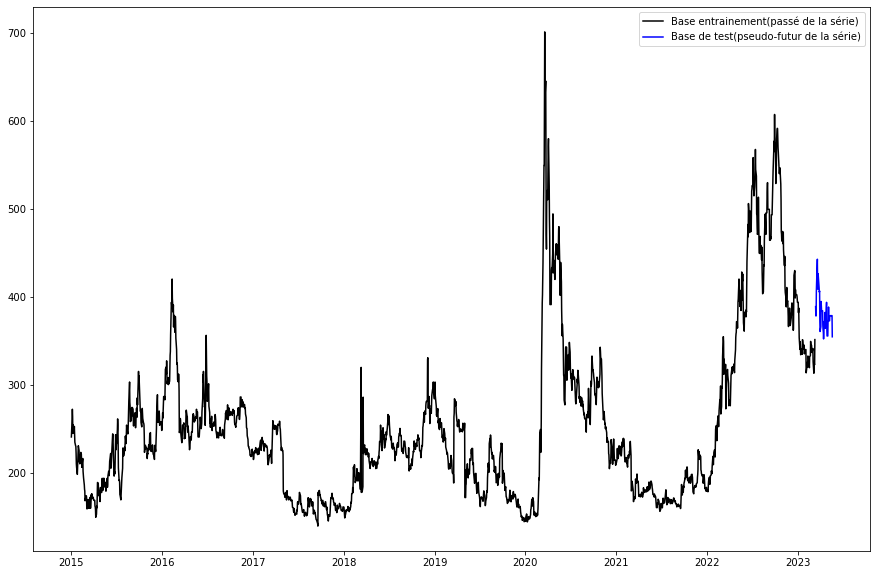

In [73]:
fig , ax  = plt.subplots(figsize=(15,10))

ax.plot(Train_Itraxx.index,Train_Itraxx['Credit_Spread'],label='Base entrainement(passé de la série)',color='Black')
ax.plot(Test_Itraxx.index,Test_Itraxx['Credit_Spread'],label='Base de test(pseudo-futur de la série)',color='Blue')

ax.legend()
plt.show()

On va donc entrainer nos données sur la base noire pour tenter au mieux de reproduire la base bleue. Toutes nos fonctions sont prètes.

In [74]:
garch_1_1 = arch_model(diff(Train_Itraxx['Credit_Spread'],
                            k_diff=1).dropna(),p=1, q=1,
                       mean='constant', vol='GARCH',
                      dist='skewt')

In [75]:
garch_1_1_results = garch_1_1.fit(disp='off')

In [76]:
garch_1_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                     Credit_Spread   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -7443.77
Distribution:      Standardized Skew Student's t   AIC:                           14899.5
Method:                       Maximum Likelihood   BIC:                           14933.5
                                                   No. Observations:                 2135
Date:                           Sun, Jun 25 2023   Df Residuals:                     2134
Time:                                   16:36:23   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0804      0.131     -0.612      0.540 [ -0.338,  0.177]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.1657      0.838      3.780  1.570e-04 [  1.524,  4.807]
alpha[1]       0.2333  3.067e-02      7.605  2.854e-14 [  0.173,  0.293]
beta[1]        0.7667  2.711e-02     28.288 4.912e-176 [  0.714,  0.820]
                               Distribution                               
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
eta            3.6707      0.288     12.762  2.674e-37   [  3.107,  4.234]
lambda         0.0713  2.614e-02      2.726  6.412e-03 [2.003e-02,  0.123]
==========================================================================

Covariance estimator: robust
"""

Comme dit précédemment, il est important d'analyser visuellement et numériquement au travers de test comment notre modèle se comporte et voir à quel point il fitte bien les données. Contrairement à pmdarima, le package arch_model ne contient pas des fonctions automatiques qui permettent de visualiser les résidus ou de les analyser numériquement. Il faut donc le faire manuellement. 

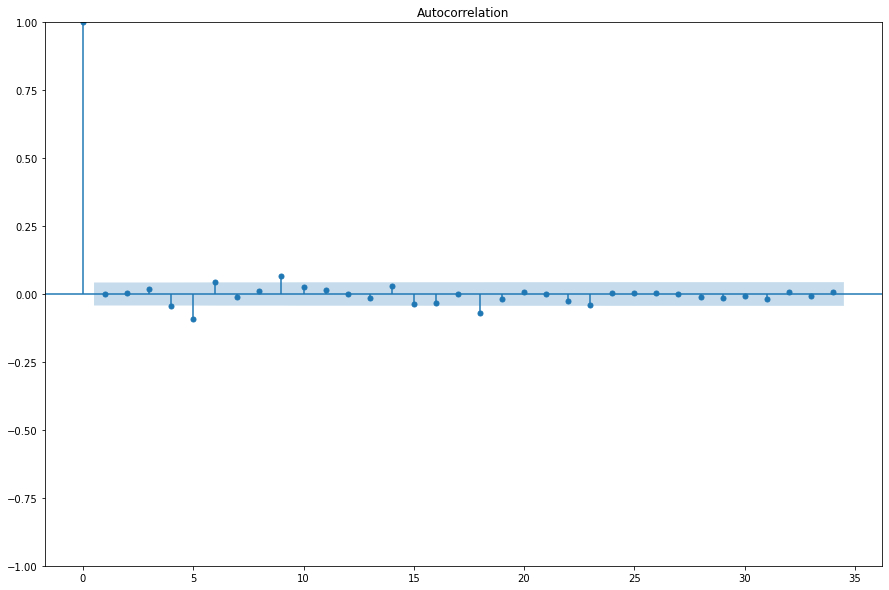

In [77]:
fig , ax = plt.subplots(figsize=(15,10))

plot_acf(garch_1_1_results.resid,alpha=0.05,lags=None,ax=ax)

plt.show()

Au vue du graphe, nous voyons qu'il ya des corrélations des erreurs qui sont significativement non nulles : ce qui signifie que le modèle $GARCH(1,1)$ n'arrive pas à capter bien toute l'information des données. Mais est ce vraiment réellement le cas ? Confirmons cela numériquement avec le test de Ljung-Box.

In [78]:
acorr_ljungbox(garch_1_1_results.resid ,lags = 10, return_df = True) 

,lb_stat,lb_pvalue
1,0.000396,0.984124
2,0.013282,0.993381
3,0.796228,0.850369
4,5.320087,0.256002
5,22.832147,0.000363
6,27.031690,0.000143
7,27.216488,0.000305
8,27.415839,0.000599
9,36.878257,0.000028
10,38.409895,0.000032


Nous avons affiché les 10 premières observations du résultat du test de Ljung-Box. On peut remarquer qu'à partir du cinquième indice, la p_value est $<$ à $5\%$, ce qui signifie qu'il ya bien des autocorrélations au sein de nos résidus et que le modèle $GARCH(1,1)$ n'est pas adapté, alors que nous avons dit précédemment que ce modèle est l'un des plus utilisé sur les marchés de sa part ses résultats. 


Voyons à présent la proportion des erreurs qui sont corréleés par rapport aux erreurs totales issues du modèle $GARCH$ sur nos données. 

In [79]:
ljbox = acorr_ljungbox(garch_1_1_results.resid , lags = 2134, return_df = True) [['lb_pvalue']] 

In [80]:
(ljbox[ljbox['lb_pvalue'] < 0.05]).count()/(ljbox[['lb_pvalue']]).count() * 100

lb_pvalue    3.88941
dtype: float64

On peut voir que approximativement, $\sim$ $4\%$ des erreurs issues du modèle $GARCH$ du DJ Itraxx X-over 3Y présentent des autocorrélations entre elles. Ce qui signifie que notre modèle $GARCH(1,1)$ a reussi à capter $\sim$ $96\%$ de l'information contenue dans la série temporelle d'entrainement. Autrement dit, un modèle $GARCH$ d'ordre 1 pour $p$ et $q$ capte $\sim$ $96\%$ de toute l'information contenue dans notre base d'entrainement. Un ordre supérieur peut probablement capter toute l'information. On voit que le gain d'ajouter un ordre et donc de complexifier le modèle est assez minime par rapport à ce que ce dernier fait déjà. Par conséquent, le modèle $GARCH(1,1)$ est celui que l'on retiendra et semble vraiment bien performer sur les données.

Confirmons cela avec des métriques : Pour ce faire, nous allons projéter sur 50 jours les prédictions que nous donnent notre modèle, puis nous allons comparer ce que ce dernier nous donne avec ce qui s'est déjà réalisé et qui se situe dans la base de test.


**Attention: Nous avons passé à la fonction arch_model, non pas la série temporelle des spreads de crédit mais bien celle de la série des spreads de crédit différenciée. Lorsque nous faisons une prédiction en Python, plutot que ce dernier nous retourne la variance estimée de la série temporelle différenciée, ce dernier va nous retourner automatiquement les prédictions de la série temporelle initiale. Par conséquent, les valeurs affichées à l'écran seront donc celles des spreads du DJ Itraxx X-over prédites et non pas les observations prédites de la série des spreads de crédit obtenues après différentiation**


Sans plus tarder projétons les observations des spreads de crédit du DJ Itraxx X-over 3Y sur 50 jours avec notre modèle $GARCH(1,1)$.

In [81]:
garch_1_1_50_days = garch_1_1_results.forecast(horizon=50).variance.values[-1,:]
garch_1_1_50_days, len(garch_1_1_50_days)

(array([244.49584639, 247.66153565, 250.82722491, 253.99291417,
        257.15860343, 260.32429268, 263.48998194, 266.6556712 ,
        269.82136046, 272.98704972, 276.15273898, 279.31842824,
        282.4841175 , 285.64980676, 288.81549602, 291.98118528,
        295.14687454, 298.3125638 , 301.47825306, 304.64394232,
        307.80963158, 310.97532084, 314.1410101 , 317.30669936,
        320.47238862, 323.63807788, 326.80376714, 329.9694564 ,
        333.13514566, 336.30083492, 339.46652418, 342.63221344,
        345.7979027 , 348.96359196, 352.12928122, 355.29497048,
        358.46065974, 361.626349  , 364.79203826, 367.95772752,
        371.12341678, 374.28910604, 377.4547953 , 380.62048456,
        383.78617382, 386.95186308, 390.11755235, 393.28324161,
        396.44893087, 399.61462013]),
 50)

In [82]:
np.squeeze(Test_Itraxx.values), len(np.squeeze(Test_Itraxx.values))

(array([388.59, 378.1 , 378.1 , 406.13, 415.86, 442.5 , 414.  , 408.5 ,
        426.  , 422.18, 410.38, 405.17, 406.5 , 372.4 , 360.36, 365.75,
        394.5 , 389.5 , 383.92, 383.92, 383.92, 367.66, 362.35, 359.91,
        351.94, 372.  , 370.  , 372.  , 382.  , 364.05, 379.5 , 387.25,
        393.5 , 365.03, 355.3 , 355.3 , 372.1 , 373.07, 388.17, 372.49,
        372.49, 378.33, 378.35, 378.36, 378.37, 378.37, 378.37, 378.38,
        378.39, 354.35]),
 50)

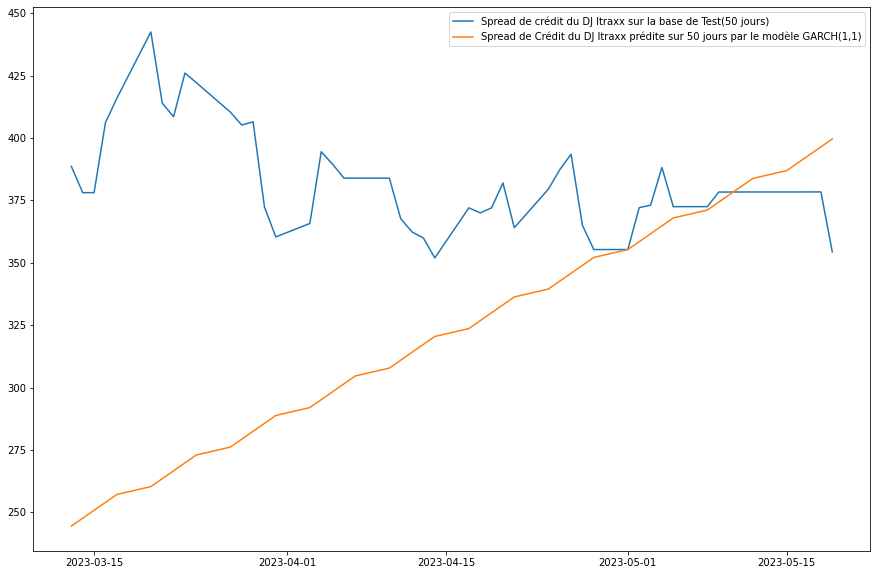

In [83]:
fig , ax = plt.subplots(figsize=(15,10))

ax.plot(Test_Itraxx.index,Test_Itraxx['Credit_Spread'],label='Spread de crédit du DJ Itraxx sur la base de Test(50 jours)')
ax.plot(Test_Itraxx.index,garch_1_1_50_days,label='Spread de Crédit du DJ Itraxx prédite sur 50 jours par le modèle GARCH(1,1)')

ax.legend()
plt.show()

Calculons les métriques pour quantifier à quel point notre modèle fonctionne

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [85]:
def metrics_computation(test_values,forecast_values):
    
    mae = mean_absolute_error(test_values,forecast_values)
    
    mse = mean_squared_error(test_values,forecast_values)
    
    rmse = np.sqrt(mse)
    
    return pd.DataFrame({'mae':mae,
                        'mse':mse,
                        'rmse':rmse}, index = [0]).T.rename(columns={0:'Metrics_values'})

In [86]:
metrics_computation(garch_1_1_50_days,np.squeeze(Test_Itraxx.values))

,Metrics_values
mae,64.867281
mse,7133.115697
rmse,84.457775


Notre modèle foctionne bien car en effet, selon le mae, la différence qu'il ya entre les valeurs des spreads de crédit sur la base du test et celles prédites par notre modèle sur la base d'entrainement est $\sim$ $ +/-64$ et $\sim$ $+/- 84$ pour le rmse, ce qui est très bien pour un modèle d'ordre $(1,1)$. 


Une fois que notre modèle performe bien, nous pouvons donc re-fitter le modèle sur toute la base de données et prédire réellement sur 50 jours ce que sera les spreads de crédit du DJ Itraxx X-over 3Y à partir de la dernière observation du jeu de données 

In [87]:
full_garch_1_1 = arch_model(Itraxx['d(1)'].dropna(),p=1,q=1,
                            mean='constant',vol='GARCH',dist='skewt')

In [88]:
full_garch_1_1_results = full_garch_1_1.fit(disp='off')

In [89]:
full_garch_1_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                              d(1)   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -7648.15
Distribution:      Standardized Skew Student's t   AIC:                           15308.3
Method:                       Maximum Likelihood   BIC:                           15342.4
                                                   No. Observations:                 2185
Date:                           Sun, Jun 25 2023   Df Residuals:                     2184
Time:                                   16:36:23   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0867      0.131     -0.662      0.508 [ -0.344,  0.170]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.1878      0.858      3.717  2.014e-04 [  1.507,  4.869]
alpha[1]       0.2311  3.034e-02      7.617  2.600e-14 [  0.172,  0.291]
beta[1]        0.7689  2.767e-02     27.793 5.320e-170 [  0.715,  0.823]
                               Distribution                               
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
eta            3.6434      0.276     13.215  7.208e-40   [  3.103,  4.184]
lambda         0.0667  2.522e-02      2.645  8.163e-03 [1.728e-02,  0.116]
==========================================================================

Covariance estimator: robust
"""

Nous n'avons plus besoin de test statistiques puisque nous savons maintenant que c'est le modèle $GARCH(1,1)$ qui performe sur notre data. Par conséquent, nous connaissons déjà les valeurs des ordres du modèle qu'il nous faut et tous les tests qui ont été fait nous confirment que ce dernier semble etre bon. A cette étape, nous avons les données et le modèle. Il ne reste plus qu'à prédire.

In [90]:
final_Itraxx_predictions = full_garch_1_1_results.forecast(horizon=50)

In [91]:
final_Itraxx_predictions = final_Itraxx_predictions.variance.values[-1,:]

final_Itraxx_predictions

array([161.16930333, 164.35706587, 167.54482841, 170.73259095,
       173.92035349, 177.10811603, 180.29587857, 183.48364112,
       186.67140366, 189.8591662 , 193.04692874, 196.23469129,
       199.42245383, 202.61021637, 205.79797891, 208.98574146,
       212.173504  , 215.36126655, 218.54902909, 221.73679163,
       224.92455418, 228.11231672, 231.30007927, 234.48784181,
       237.67560436, 240.8633669 , 244.05112945, 247.238892  ,
       250.42665454, 253.61441709, 256.80217964, 259.98994218,
       263.17770473, 266.36546728, 269.55322982, 272.74099237,
       275.92875492, 279.11651747, 282.30428002, 285.49204256,
       288.67980511, 291.86756766, 295.05533021, 298.24309276,
       301.43085531, 304.61861786, 307.80638041, 310.99414296,
       314.18190551, 317.36966806])

In [92]:
final_Itraxx_index = pd.date_range(start=Itraxx.index[-1],periods=50,freq='B')
final_Itraxx_index

DatetimeIndex(['2023-05-19', '2023-05-22', '2023-05-23', '2023-05-24',
               '2023-05-25', '2023-05-26', '2023-05-29', '2023-05-30',
               '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-05',
               '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09',
               '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15',
               '2023-06-16', '2023-06-19', '2023-06-20', '2023-06-21',
               '2023-06-22', '2023-06-23', '2023-06-26', '2023-06-27',
               '2023-06-28', '2023-06-29', '2023-06-30', '2023-07-03',
               '2023-07-04', '2023-07-05', '2023-07-06', '2023-07-07',
               '2023-07-10', '2023-07-11', '2023-07-12', '2023-07-13',
               '2023-07-14', '2023-07-17', '2023-07-18', '2023-07-19',
               '2023-07-20', '2023-07-21', '2023-07-24', '2023-07-25',
               '2023-07-26', '2023-07-27'],
              dtype='datetime64[ns]', freq='B')

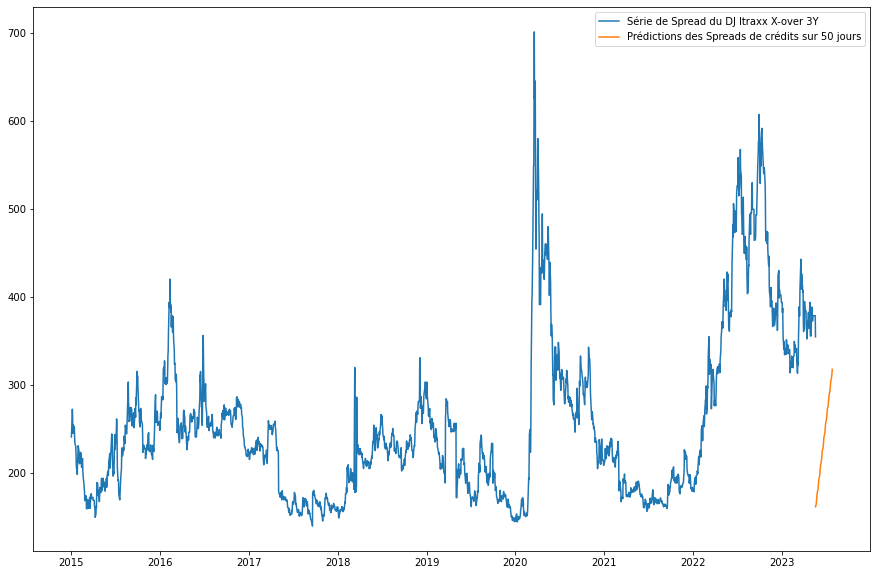

In [93]:
fig , ax  = plt.subplots(figsize=(15,10))

ax.plot(Itraxx.index,Itraxx['Credit_Spread'],label='Série de Spread du DJ Itraxx X-over 3Y')
ax.plot(final_Itraxx_index,final_Itraxx_predictions,label='Prédictions des Spreads de crédits sur 50 jours')

ax.legend()
plt.show()

Ce qui marque la fin de cette seconde partie du projet.


**Conclusion : La série temporelle du DJ Itraxx X-over de maturité 3Y peut etre modélisée avec un processus $GARCH(1,1)$. On peut se servir de ce processus pour prédire à quoi vont ressembler les cours des spreads de crédit du DJ Itraxx X-over. Cependant, en analysant le graphique des prédictions des spreads de crédit du DJ Itraxx, on remarque que ces derniers n'ont pas la strucutre en forme fractale de la série historique. Cela met en exergue la difficulté et les problèmes rencontrés lors des prédictions des séries temporelles. Ces dernières étant des sytèmes ouverts, elles peuvent etre impactées par n'importe quelle perturbation externe, ce que ne prennent pas en compte les modèles mathématiques, meme les plus sophistiquées.**

<div class="alert alert-info"><h3>Fonctions utilisées:</h3>
<tt>
<strong>
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html'>sklearn.metrics.mean_absolute_error</a></strong><font color=black>(y_true,y_pred,etc...)</font>&nbsp;&nbsp;&nbsp;Calcul les mean_absolute_error d'un modèle mathématique avec scikit-learn<br>
    
    
  
<strong>
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html'>sklearn.metrics.mean_squared_error</a></strong><font color=black>(y_true,y_pred,etc...)</font>&nbsp;&nbsp;&nbsp;Calcul les mean_squared_error d'un modèle mathématique avec scikit-learn<br>
    
    
    
<strong>
<a href = 'https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html'>statsmodels.stats.diagnostic.accor_ljungbox.html</a></strong><font color=black>(x, lags, etc...)</font>&nbsp;&nbsp;&nbsp;Réalise le test de Ljung-Box sur des résidus issus d'un modèle mathématique<br>